# Financial Statement Fraud Detection
#### Ryan Huang

## Setup


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
finfraud = pd.read_csv("/Users/ryanhuang/Developer/GraLNA/data_FraudDetection_JAR2020.csv")

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf


In [3]:
finfraud.head()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,NaN,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,NaN,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,NaN,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,NaN,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,NaN,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


In [4]:
finfraud.columns.values

array(['fyear', 'gvkey', 'p_aaer', 'misstate', 'act', 'ap', 'at', 'ceq',
       'che', 'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt',
       'ivao', 'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect',
       'sale', 'sstk', 'txp', 'txt', 'xint', 'prcc_f', 'dch_wc',
       'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm',
       'ch_roa', 'issue', 'bm', 'dpi', 'reoa', 'EBIT', 'ch_fcf'],
      dtype=object)

In [5]:
finfraud.shape

(146045, 46)

We can learn even more about our `DataFrame`. The `info()` method gives a few useful pieces of information, including the shape of the `DataFrame`, the variable type of each column, and the amount of memory stored.

The output from `info()` displayed below shows that the fields ‘year’ and ‘pop’ (population) are represented as ‘float’ (that is: numbers with a decimal point). This is not appropriate: year and population should be integers or whole numbers. We can change the data-type with the function `astype()`. The code for `astype()` is shown below; however, we will change the data types later in this lesson.

In [6]:
finfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       964 non-null     float64
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

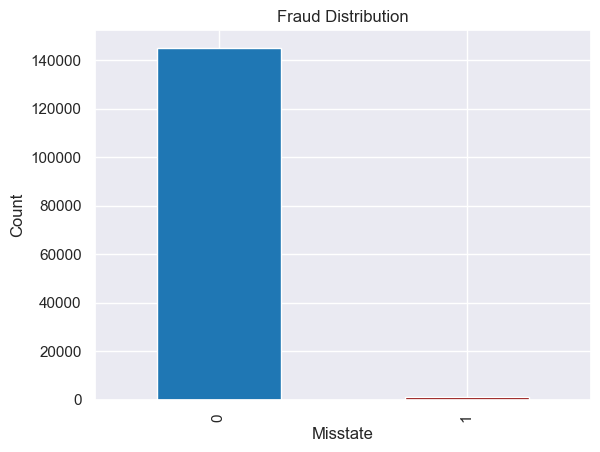

In [182]:
# graph misstate=1 and misstate=0 with misstate=0 as not fraud and misstate=1 as fraud for the labels, color the fraud bar red and not fraud bar default color 
finfraud['misstate'].value_counts().plot(kind='bar', color=['tab:blue', 'darkred'])
plt.title('Fraud Distribution')
plt.xlabel('Misstate')
plt.ylabel('Count')
plt.show()





The `describe()` method will take the numeric columns and provide a summary of their values. This is useful for getting a sense of the ranges of values and seeing if there are any unusual or suspicious numbers.


In [7]:
finfraud.describe()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,146045.000000,146045.000000,964.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,145453.000000,130127.000000,128938.000000,133367.000000,146045.000000,146027.000000,136817.000000,145454.000000,145454.000000,140638.000000
mean,2002.011702,54243.435516,2503.840249,0.006601,737.847759,181.993488,2374.041576,887.126243,218.657186,1302.280756,...,0.499790,0.185169,-0.090980,-0.010208,0.863487,0.466137,1.042207,-3.191197,-0.238754,-0.008842
std,6.959894,59937.455765,912.093250,0.080976,3744.542368,1047.546104,11957.736980,5056.948150,1330.490185,7870.665783,...,0.274129,1.383354,2.844807,0.379574,0.343333,1.314661,0.495286,12.932219,1.059134,0.548216
min,1990.000000,1004.000000,371.000000,0.000000,-0.254000,0.000000,0.000000,-25560.000000,-34.000000,-366.645000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,1996.000000,10658.000000,1803.000000,0.000000,8.277000,1.151000,18.281000,6.337000,1.144000,6.795000,...,0.270023,-0.073635,-0.260164,-0.058635,1.000000,0.191546,0.854248,-0.894633,-0.128135,-0.123402
50%,2002.000000,25088.000000,2620.500000,0.000000,47.501000,6.462000,105.346000,47.308000,9.373000,53.382000,...,0.524640,0.067918,-0.023205,-0.001893,1.000000,0.442172,0.974302,-0.008046,0.043701,-0.026155
75%,2008.000000,66586.000000,3180.000000,0.000000,249.832000,42.259000,672.929000,271.547000,60.286000,372.730000,...,0.726663,0.250237,0.139960,0.042188,1.000000,0.805320,1.097582,0.229724,0.108059,0.062294
max,2014.000000,317264.000000,3996.000000,1.000000,152629.000000,39903.000000,410074.000000,284434.000000,85709.000000,435726.253000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


The `DataFrame` function `describe()` just blindly looks at all numeric variables. We wouldn't actually want to take the mean year. Additionally, we obtain ‘NaN’ values for our quartiles. This suggests we might have missing data which we can (and will) deal with shortly when we begin to clean our data.

For now, let's pull out only the columns that are truly continuous numbers (i.e. ignore the description for ‘year’). This is a preview of selecting columns from the data; we'll talk more about how to do it later in the lesson.

In [8]:
# List of columns to exclude
keys = ['fyear', 'gvkey', 'p_aaer', 'misstate']

# Create a list of all columns
all_columns = finfraud.columns.tolist()

# Remove the unwanted columns from the list
relevant_cols = [col for col in all_columns if col not in keys]

finfraud[relevant_cols].describe()


,act,ap,at,ceq,che,cogs,csho,dlc,dltis,dltt,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,145453.000000,130127.000000,128938.000000,133367.000000,146045.000000,146027.000000,136817.000000,145454.000000,145454.000000,140638.000000
mean,737.847759,181.993488,2374.041576,887.126243,218.657186,1302.280756,97.004595,127.228109,201.312344,538.377614,...,0.499790,0.185169,-0.090980,-0.010208,0.863487,0.466137,1.042207,-3.191197,-0.238754,-0.008842
std,3744.542368,1047.546104,11957.736980,5056.948150,1330.490185,7870.665783,540.874888,1023.091819,1628.477359,2660.670828,...,0.274129,1.383354,2.844807,0.379574,0.343333,1.314661,0.495286,12.932219,1.059134,0.548216
min,-0.254000,0.000000,0.000000,-25560.000000,-34.000000,-366.645000,0.000000,-0.069000,-19.687000,0.000000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,8.277000,1.151000,18.281000,6.337000,1.144000,6.795000,8.796000,0.008000,0.000000,0.000000,...,0.270023,-0.073635,-0.260164,-0.058635,1.000000,0.191546,0.854248,-0.894633,-0.128135,-0.123402
50%,47.501000,6.462000,105.346000,47.308000,9.373000,53.382000,22.540000,1.363000,0.063000,4.474000,...,0.524640,0.067918,-0.023205,-0.001893,1.000000,0.442172,0.974302,-0.008046,0.043701,-0.026155
75%,249.832000,42.259000,672.929000,271.547000,60.286000,372.730000,60.736000,12.750000,24.873000,126.212000,...,0.726663,0.250237,0.139960,0.042188,1.000000,0.805320,1.097582,0.229724,0.108059,0.062294
max,152629.000000,39903.000000,410074.000000,284434.000000,85709.000000,435726.253000,100092.395000,75553.000000,188791.978000,120274.000000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


We can also extract one specific variable metric at a time if we wish:

In [9]:
print (finfraud['act'].min())
print (finfraud['act'].max())
print (finfraud['act'].mean())
print (finfraud['act'].std())
print (finfraud['act'].count())

-0.254
152629.0
737.8477586634256
3744.542367791546
146045


#### Values in columns

Next, let's say you want to see all the unique values for the `region` column. One way to do this is:

In [10]:
pd.unique(finfraud.p_aaer)

array([  nan,  789.,  683.,  823.,  573., 1126.,  395.,  389.,  669.,
        508.,  702.,  555.,  751.,  591.,  473.,  543.,  843.,  612.,
        762., 1140.,  715.,  778.,  696., 1602.,  906.,  838.,  874.,
        915.,  621.,  371.,  951.,  857.,  960., 1106.,  623.,  965.,
       2068.,  684., 1037.,  999., 2313.,  903.,  812.,  926.,  901.,
       1033.,  598.,  782., 1071.,  776.,  987.,  967.,  956., 1378.,
       1184.,  839., 1123., 1067., 1233., 1237.,  787., 1053., 1044.,
       1301.,  975.,  834.,  959., 1240., 1331., 1176., 1110., 2754.,
       1047.,  837., 1285.,  786., 3073., 1128., 1104.,  846.,  992.,
       1311., 1181., 1518., 1533., 1328., 1470., 1169., 1308., 1343.,
       1258., 1397., 3182., 1393., 2555., 1154., 1422., 1511., 1190.,
       1563., 1536., 1568., 3217.,  990., 1534., 1259., 1454., 1629.,
       1456., 1531., 1648., 1718., 1480., 2232., 2370., 2551., 2819.,
       1329., 2449., 1542., 2620., 1575., 1766., 1295., 2953., 3045.,
       1967., 2661.,

This output is useful, but it looks like there may be some formatting issues causing the same region to be counted more than once. Let's take it a step further and find out to be sure. 

As mentioned previously, the command `value_counts()` gives you a first global idea of your categorical data such as strings. In this case that is the column `region`. Run the code below.

In [11]:
# How many unique regions are in the data?
print(len(finfraud['p_aaer'].unique()))

# How many times does each unique region occur?
finfraud['p_aaer'].value_counts()

413


3073.0    13
3855.0    12
3182.0    11
2754.0    11
2953.0     9
          ..
1559.0     1
2105.0     1
1669.0     1
2218.0     1
3949.0     1
Name: p_aaer, Length: 412, dtype: int64

The table reveals some problems in our data set. The data set covers 12 years, so each ‘region’ should appear 12 times, but some regions appear more than 12 times and others fewer than 12 times. We also see inconsistencies in the region names (string variables are very susceptible to those), for instance:

Asia_china	vs. Asia_China

Another type of problem we see is the various names of 'Congo'. In order to analyze this dataset appropriately we need to take care of these issues. We will fix them in the next section on data cleaning.

#### Exercises
Are there other columns in our `DataFrame` that have categorical variables? If so, run some code to list the categories below. Save your list to a variable and count the number of unique categories using `len`.

What is the outcome when you run `value_counts()`?

## Data cleaning

## Handling Missing Data

Missing data (often denoted as 'NaN'- not a number- in Pandas, or as 'null') is an important issue to handle because Pandas cannot compute on rows or columns with missing data. 'NaN' or 'null' does not mean the value at that position is zero, it means that there is no information at that position. Ignoring missing data doesn't make it go away. There are different ways of dealing with it which include:

* analyzing only the available data (i.e. ignore the missing data)
* input the missing data with replacement values and treating these as though they were observed
* input the missing data and account for the fact that these were inputed with uncertainty (ex: create a new boolean variable so you know that these values were not actually observed)
* use statistical models to allow for missing data--make assumptions about their relationships with the available data as necessary

For our purposes with the dirty gapminder data set, we know our missing data is excess (and unnecessary) and we are going to choose to analyze only the available data. To do this, we will simply remove rows with missing values.

This is incredibly easy to do because Pandas allows you to either remove all instances with null data or replace them with a particular value.

`df = df.dropna()` drops rows with any column having NA/null data.  `df = df.fillna(value)` replaces all NA/null data with the argument `value`.

For more fine-grained control of which rows (or columns) to drop, you can use `how` or `thresh`. These are more advanced topics and are not covered in this lesson; you are encouraged to explore them on your own.

In [12]:
#fill empty with median of that column
finfraud_copy = finfraud.fillna(finfraud.median())
finfraud_copy.head()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,2620.5,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,2620.5,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,2620.5,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,2620.5,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,2620.5,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


## Changing Data Types
We can change the data-type with the function `astype()`. The code for `astype()` is shown below.

In [13]:
finfraud_copy['fyear'] = finfraud_copy['fyear'].astype(int)
finfraud_copy['gvkey'] = finfraud_copy['gvkey'].astype(int)
finfraud_copy['p_aaer'] = finfraud_copy['p_aaer'].astype(int)
finfraud_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   gvkey        146045 non-null  int64  
 2   p_aaer       146045 non-null  int64  
 3   misstate     146045 non-null  int64  
 4   act          146045 non-null  float64
 5   ap           146045 non-null  float64
 6   at           146045 non-null  float64
 7   ceq          146045 non-null  float64
 8   che          146045 non-null  float64
 9   cogs         146045 non-null  float64
 10  csho         146045 non-null  float64
 11  dlc          146045 non-null  float64
 12  dltis        146045 non-null  float64
 13  dltt         146045 non-null  float64
 14  dp           146045 non-null  float64
 15  ib           146045 non-null  float64
 16  invt         146045 non-null  float64
 17  ivao         146045 non-null  float64
 18  ivst         146045 non-

## Handling (Unwanted) Repetitive Data
You can identify which observations are duplicates.
The call `df.duplicated()` will return boolean values for each row in the `DataFrame` telling you whether or not a row is repeated.

In cases where you don’t want repeated values (we wouldn’t--we only want each country to be represented once for every relevant year), you can easily drop such duplicate rows with the call `df.drop_duplicates()`.

In [14]:
finfraud_copy.duplicated().head() #shows we have a repetition within the first 5 rows

0    False
1    False
2    False
3    False
4    False
dtype: bool

Let's look at the first five rows of our data set again (remember we removed the NaNs):

In [15]:
finfraud_copy.head()

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,2620,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,2620,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,2620,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,2620,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,2620,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


### Removing and renaming columns

We also want to remove the space from the `life exp` column name. We can do that with Pandas `rename` method. It takes a dictionary as its argument, with the old column names as keys and new column names as values.

If you're unfamiliar with dictionaries, they are a very useful data structure in Python.  You can read more about them [here](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [16]:
finfraud_copy = finfraud_copy.rename(columns={'act' : 'current_assets_total',
                                              'at' : 'total_assets',
                                              'ap' : 'accounts_payable',
                                            'ceq' : 'common_equity',
                                            'che' : 'cash',
                                            'cogs' : 'cost_of_goods_sold',
                                            'csho' : 'common_shares_outstanding',
                                            'dlc' : 'current_debt',
                                            'dltt' : 'long_term_debt',
                                            'dp' : 'depreciation',
                                            'ib' : 'income_before_extraordinary_items',
                                            'invt' : 'inventories',
                                            'ivao' : 'investments_advances_other',
                                            'ivst' : 'short_term_investments',
                                            'lct' : 'current_liabilities',
                                            'lt' : 'total_liabilities',
                                            'ni' : 'net_income',
                                            'ppegt' : 'gross_property_plant_equipment',
                                            'pstk' : 'preferred_stock',
                                            're' : 'retained_earnings',
                                            'rect' : 'receivables',
                                            'sale' : 'sales',
                                            'seq' : 'stockholders_equity',
                                            'txt' : 'income_tax',
                                            'xint' : 'interest_expense'})

finfraud_copy.columns.values
#finfraud_copy.head()

array(['fyear', 'gvkey', 'p_aaer', 'misstate', 'current_assets_total',
       'accounts_payable', 'total_assets', 'common_equity', 'cash',
       'cost_of_goods_sold', 'common_shares_outstanding', 'current_debt',
       'dltis', 'long_term_debt', 'depreciation',
       'income_before_extraordinary_items', 'inventories',
       'investments_advances_other', 'short_term_investments',
       'current_liabilities', 'total_liabilities', 'net_income',
       'gross_property_plant_equipment', 'preferred_stock',
       'retained_earnings', 'receivables', 'sales', 'sstk', 'txp',
       'income_tax', 'interest_expense', 'prcc_f', 'dch_wc', 'ch_rsst',
       'dch_rec', 'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa',
       'issue', 'bm', 'dpi', 'reoa', 'EBIT', 'ch_fcf'], dtype=object)

#### Sorting
Sorting may help to further organize and inspect your data. The command `sort_values()` takes a number of arguments; the most important ones are `by` and `ascending.` The following command will sort your `DataFrame` by year, beginning with the most recent.

In [17]:
finfraud_copy.sort_values(by='fyear', ascending = True)

,fyear,gvkey,p_aaer,misstate,current_assets_total,accounts_payable,total_assets,common_equity,cash,cost_of_goods_sold,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,2620,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
3045,1990,12657,2620,0,21.764,7.308,26.032,6.052,0.046,35.325,...,0.841964,0.105255,-0.250525,0.008243,1,0.863431,0.868617,0.049132,0.079556,-0.027282
3046,1990,12658,2620,0,17.212,10.662,19.021,1.131,0.833,101.761,...,0.881710,0.252879,0.202005,0.014307,1,0.052684,0.898447,-0.166080,0.271805,-0.130685
3047,1990,12659,2620,0,103.578,23.967,115.217,42.172,10.946,186.994,...,0.832238,0.150974,0.123219,0.105367,1,0.676974,1.017065,0.247811,0.104542,0.085382
3048,1990,12661,2620,0,10.137,3.861,44.071,7.725,2.445,111.669,...,0.250210,0.162140,0.506092,0.016142,1,0.662294,0.817797,0.089515,0.074221,0.030613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142289,2014,23667,2620,0,5382.525,3212.815,17108.394,5861.724,1965.202,28085.211,...,0.410525,-0.121373,-0.028198,-0.133705,0,0.399119,1.006043,-0.142099,0.074692,0.084438
142288,2014,23623,2620,0,1.211,0.210,1.498,-1.529,0.524,0.804,...,0.620160,0.508782,0.573692,1.621628,1,-0.263650,1.157848,-30.336449,-1.324433,0.708687
142287,2014,23561,2620,0,0.037,5.960,9.665,-3.063,0.014,0.000,...,0.004515,0.067918,-0.023205,-0.040838,0,-0.217883,0.974302,-11.412933,-0.018934,-0.104887
142295,2014,23790,2620,0,8.492,0.993,10.210,-10.727,3.586,5.426,...,0.555338,0.077364,-0.009202,0.048768,1,-0.397551,1.377627,-3.288443,0.179040,0.123440


### Exercise

Organize your data set by country, from ‘Afganistan’ to ‘Zimbabwe’.

## Summarize and plot

Summaries (but can’t *say* statistics…)
* Sort data
* Can make note about using numpy functions, dif between `DataFrame` and `array`
Good Plots for the data/variable type



Plots 
* of subsets, 
* single variables
* pairs of variables
* Matplotlib syntax (w/ Seaborn for defaults (prettier, package also good for more analysis later...))

Exploring is often iterative - summarize, plot, summarize, plot, etc. - sometimes it branches…


## Summarizing data



In [187]:
finfraud_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   fyear                              146045 non-null  int64  
 1   gvkey                              146045 non-null  int64  
 2   p_aaer                             146045 non-null  int64  
 3   misstate                           146045 non-null  int64  
 4   current_assets_total               146045 non-null  float64
 5   accounts_payable                   146045 non-null  float64
 6   total_assets                       146045 non-null  float64
 7   common_equity                      146045 non-null  float64
 8   cash                               146045 non-null  float64
 9   cost_of_goods_sold                 146045 non-null  float64
 10  common_shares_outstanding          146045 non-null  float64
 11  current_debt                       1460

0    145081
1       964
Name: misstate, dtype: int64

We also saw above that the `describe()` method will take the numeric columns and give a summary of their values. We have to remember that we changed the column names and this time it shouldn't have NaNs.

### More summaries

What if we just want a single value, like the mean of the population? We can call mean on a single column this way:


In [19]:
finfraud_copy['fyear'].median()

2002.0

In [167]:
finfraud_misstate = finfraud_copy[finfraud_copy['misstate'] == 1]
finfraud_per_year = finfraud_misstate[['fyear', 'misstate']].groupby(by='fyear').count()
finfraud_per_year = finfraud_per_year.reset_index()

# now want to see most common repeaters
finfraud_repeater = finfraud_misstate[['gvkey', 'misstate']].groupby(by='gvkey').count()
finfraud_repeater = finfraud_repeater.reset_index()
finfraud_repeater = finfraud_repeater.sort_values(by='misstate', ascending = False)
finfraud_repeater = finfraud_repeater[finfraud_repeater['misstate'] >= 6]

# want to eliminate serial fraud issue so keep only the first year of fraud for a gvkey if the years are in succession
finfraud_per_year_unique = finfraud_misstate.sort_values(by=['gvkey', 'fyear'], ascending = True)
finfraud_per_year_unique = finfraud_per_year_unique.drop_duplicates(subset='gvkey', keep='first')
finfraud_per_year_unique = finfraud_per_year_unique[['fyear', 'misstate']].groupby(by='fyear').count()
finfraud_per_year_unique = finfraud_per_year_unique.reset_index()

# adding company names to gvkey so bar chart is easier to read
file1 = '/Users/ryanhuang/Developer/GraLNA/New/gvkeys.xls'
comp_data = pd.read_excel(file1)
comp_data = comp_data[['GVKEY', 'CONAME']]
comp_data = comp_data.rename(columns={'GVKEY' : 'gvkey'})

finfraud_repeater = finfraud_repeater.merge(comp_data, on='gvkey', how='left')
finfraud_repeater = finfraud_repeater.sort_values(by='misstate', ascending = False)
#keep coname and misstate columns in that order and rename coname to Company Name
finfraud_repeater = finfraud_repeater[['CONAME', 'misstate']]
finfraud_repeater = finfraud_repeater.rename(columns={'CONAME' : 'Company Name'})
finfraud_repeater



,Company Name,misstate
0,BLACK BOX CORP,13
2,OVERSEAS SHIPHOLDING GROUP,12
1,AFFILIATED COMPUTER SERVICES,12
3,UNITEDHEALTH GROUP INC,11
4,INTEGRATED SILICON SOLUTION,9
5,MERCURY INTERACTIVE CORP,9
6,MONSTER WORLDWIDE INC,8
7,BROADCOM CORP -CL A,8
8,VITESSE SEMICONDUCTOR CORP,8
11,COMVERSE TECHNOLOGY INC,7


What if we wanted a new `DataFrame` that just contained these summaries? This could be a table in a report, for example.

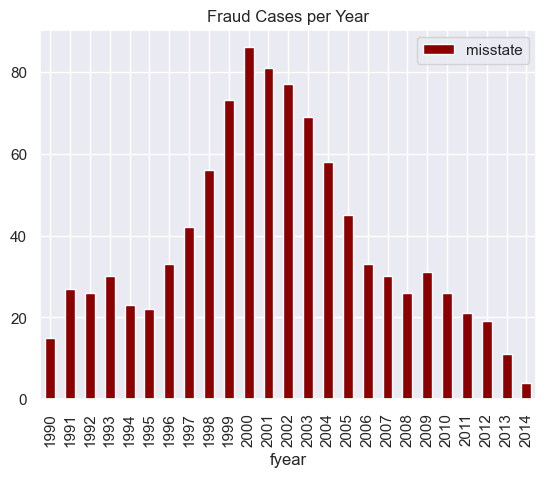

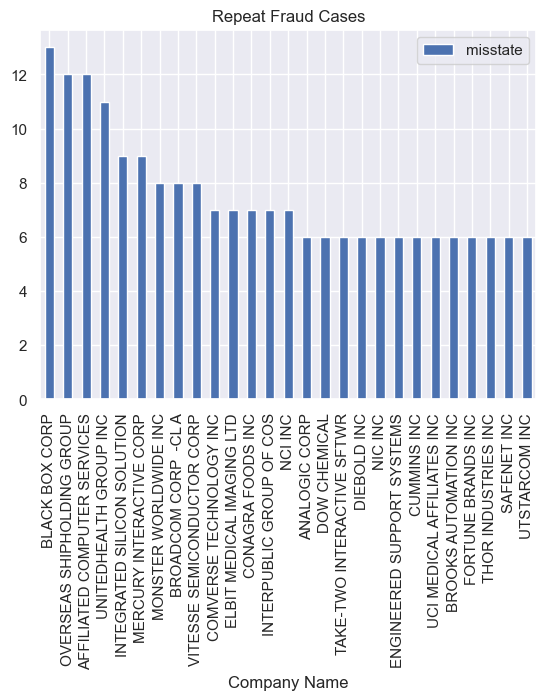

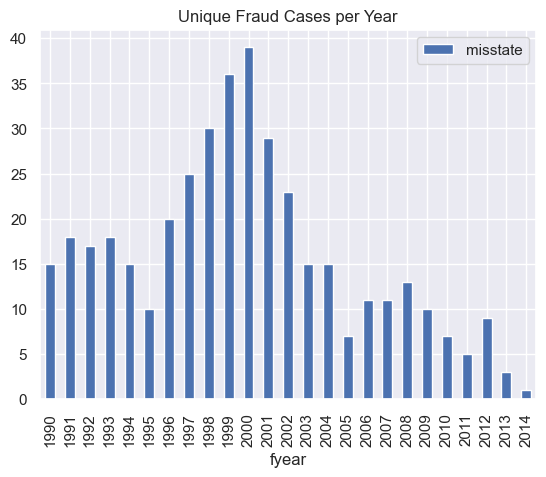

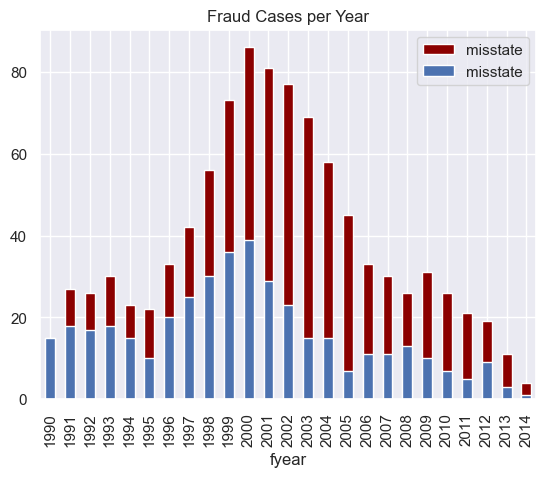

In [174]:

finfraud_per_year.plot(x='fyear', y='misstate', kind='bar', title='Fraud Cases per Year', color='darkred')
finfraud_repeater.plot(x='Company Name', y='misstate', kind='bar', title='Repeat Fraud Cases')
finfraud_per_year_unique.plot(x='fyear', y='misstate', kind='bar', title='Unique Fraud Cases per Year')

#graph the two bar charts per year and unique onto one graph with different colors 
fig, ax = plt.subplots()
finfraud_per_year.plot(x='fyear', y='misstate', kind='bar', color='darkred', ax=ax)
finfraud_per_year_unique.plot(x='fyear', y='misstate', kind='bar', ax=ax)
plt.title('Fraud Cases per Year')
plt.show()







#finfraud_per_year_unique.plot(x='fyear', y='misstate', kind='bar', title='Unique Fraud Cases per Year')


## Visualization with `matplotlib`

Recall that [matplotlib](http://matplotlib.org) is Python's main visualization 
library. It provides a range of tools for constructing plots and numerous 
high-level plotting libraries (e.g., [Seaborn](http://seaborn.pydata.org)) are 
built with matplotlib in mind. When we were in the early stages of setting up 
our analysis, we loaded these libraries like so:

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

*Consider the above three commands to be essential practice for plotting (as
essential as **`import`** `pandas` **`as`** `pd` is for data munging).*

Now, let's turn to data visualization. In order to get a feel for the properties
of the data set we are working with, data visualization is key. While, we will
focus only on the essentials of how to properly construct plots in univariate
and bivariate settings here, it's worth noting that both matplotlib and Seaborn
support a diversity of plots: [matplotlib 
gallery](http://matplotlib.org/gallery.html), [Seaborn
gallery](http://seaborn.pydata.org/examples/). 


---

### Single variables

* __Histograms__ - provide a quick way of visualizing the distribution of numerical
  data, or the frequencies of observations for categorical variables.

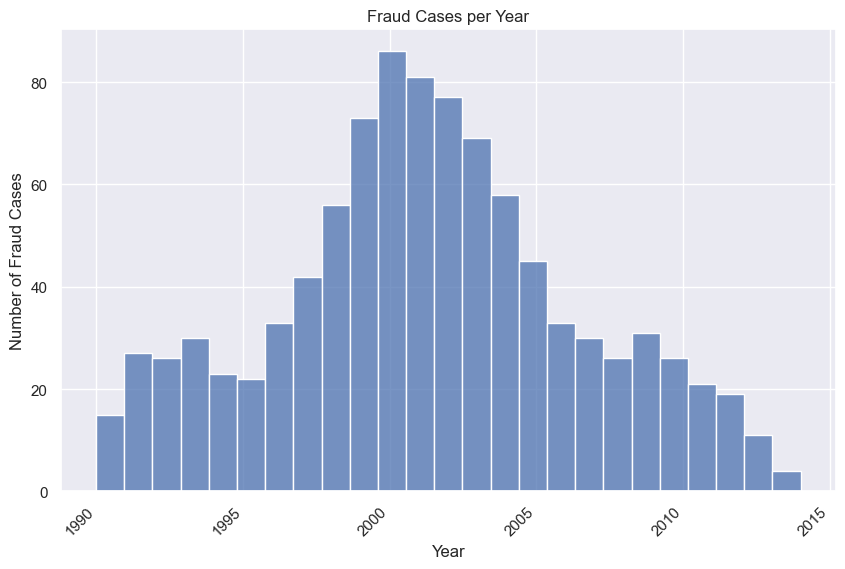

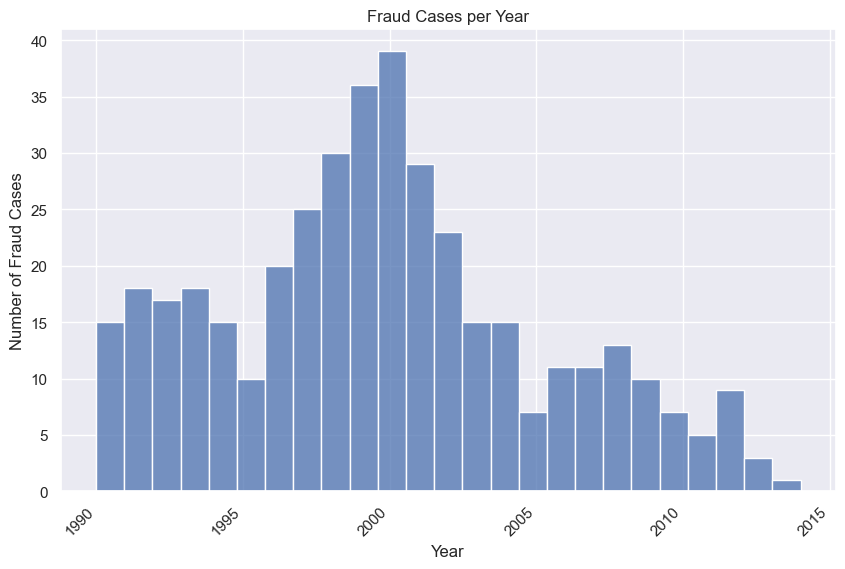

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=finfraud_per_year, x='fyear', weights='misstate', bins=len(finfraud_per_year['fyear'].unique()), kde=False)
plt.title('Fraud Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=finfraud_per_year_unique, x='fyear', weights='misstate', bins=len(finfraud_per_year['fyear'].unique()), kde=False)
plt.title('Fraud Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45, ha='right')
plt.show()


# Logistic Regression

In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train = X1_normalized_df[X1['fyear'] <= year - 2]
    X_test = X1_normalized_df[X1['fyear'] == year]
    y_train = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # Calculate the class weight ratio
    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

    # Create a logistic regression model with class weights
    model = LogisticRegression(random_state=42, class_weight={0: 1, 1: class_weight_ratio})

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

  # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    # The AUC is a measure of how well the model can distinguish between classes.
    # An AUC of 1.0 is ideal, while an AUC of 0.5 indicates that the model is no better than random.
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/Logit_results.csv', index=False)


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for year 2003: 0.7183792237845894
Sensitivity for year 2003: 0.043478260869565216
NDCG@59 for year 2003: 0.04076681103706372
Precision for year 2003: 0.05084745762711865
Best threshold for year 2003: 0.961
Accuracy for year 2003: 0.9730814245109514
Precision for year 2003: 0.0660377358490566
Recall for year 2003: 0.10144927536231885
True Positives for year 2003: 7
False Positives for year 2003: 99
False Negatives for year 2003: 62
AUC for year 2003: 0.7183792237845894


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2004: 0.7165559493908594
Sensitivity for year 2004: 0.05172413793103448
NDCG@59 for year 2004: 0.043676804586868026
Precision for year 2004: 0.05084745762711865
Best threshold for year 2004: 0.998
Accuracy for year 2004: 0.9865183687226154
Precision for year 2004: 0.07692307692307693
Recall for year 2004: 0.034482758620689655
True Positives for year 2004: 2
False Positives for year 2004: 24
False Negatives for year 2004: 56
AUC for year 2004: 0.7165559493908594


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2005: 0.6707192238646346
Sensitivity for year 2005: 0.022222222222222223
NDCG@58 for year 2005: 0.014568060379130698
Precision for year 2005: 0.017241379310344827
Best threshold for year 2005: 0.995
Accuracy for year 2005: 0.9880607197680369
Precision for year 2005: 0.037037037037037035
Recall for year 2005: 0.022222222222222223
True Positives for year 2005: 1
False Positives for year 2005: 26
False Negatives for year 2005: 44
AUC for year 2005: 0.6707192238646346


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2006: 0.7192469374597035
Sensitivity for year 2006: 0.030303030303030304
NDCG@59 for year 2006: 0.012918815218322341
Precision for year 2006: 0.01694915254237288
Best threshold for year 2006: 0.9460000000000001
Accuracy for year 2006: 0.9773188896411645
Precision for year 2006: 0.028037383177570093
Recall for year 2006: 0.09090909090909091
True Positives for year 2006: 3
False Positives for year 2006: 104
False Negatives for year 2006: 30
AUC for year 2006: 0.7192469374597035


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2007: 0.69137261619276
Sensitivity for year 2007: 0.0
NDCG@58 for year 2007: 0.0
Precision for year 2007: 0.0
Best threshold for year 2007: 0.8280000000000001
Accuracy for year 2007: 0.9107021131561008
Precision for year 2007: 0.01568627450980392
Recall for year 2007: 0.26666666666666666
True Positives for year 2007: 8
False Positives for year 2007: 502
False Negatives for year 2007: 22
AUC for year 2007: 0.69137261619276


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2008: 0.7029386653446804
Sensitivity for year 2008: 0.038461538461538464
NDCG@56 for year 2008: 0.02263325536455787
Precision for year 2008: 0.017857142857142856
Best threshold for year 2008: 0.999
Accuracy for year 2008: 0.9932287954383464
Precision for year 2008: 0.07142857142857142
Recall for year 2008: 0.038461538461538464
True Positives for year 2008: 1
False Positives for year 2008: 13
False Negatives for year 2008: 25
AUC for year 2008: 0.7029386653446804
     year       auc  accuracy  precision    recall  true_positives  \
0  2003.0  0.718379  0.973081   0.066038  0.101449             7.0   
1  2004.0  0.716556  0.986518   0.076923  0.034483             2.0   
2  2005.0  0.670719  0.988061   0.037037  0.022222             1.0   
3  2006.0  0.719247  0.977319   0.028037  0.090909             3.0   
4  2007.0  0.691373  0.910702   0.015686  0.266667             8.0   
5  2008.0  0.702939  0.993229   0.071429  0.038462             1.0   

   false_positives  false_neg

/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2537647293.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)


### Data Summary

In [25]:
#define results dataframe with method, average auc, ndcg, precision, and sensitivity
ML_results = pd.DataFrame(columns=['method', 'auc', 'NDCG_at_k', 'precision_JAR', 'sensitivity'])

# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results['auc'].mean()))
print("Average NDCG: {}".format(results['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results['sensitivity'].mean()))

# Add the average results to the DataFrame
ML_results = ML_results.append({'method': 'Logit', 'auc': results['auc'].mean(), 'NDCG_at_k': results['NDCG_at_k'].mean(), 'precision_JAR': results['precision_JAR'].mean(), 'sensitivity': results['sensitivity'].mean()}, ignore_index=True)

# precision and sensitivity converted to percentage with symbol and rename precision_jar to precision, keep three decimal places for others
ML_results['auc'] = ML_results['auc'].map("{:.3}".format)
ML_results['NDCG_at_k'] = ML_results['NDCG_at_k'].map("{:.3}".format)
ML_results['precision'] = ML_results['precision_JAR'].map("{:.3%}".format)
ML_results['sensitivity'] = ML_results['sensitivity'].map("{:.3%}".format)
ML_results = ML_results.drop(columns='precision_JAR')

print(ML_results)



Average AUC: 0.7032021026728712
Average NDCG: 0.022427291097657107
Average Precision: 0.02562376499401631
Average Sensitivity: 0.03103153163123178
  method    auc NDCG_at_k sensitivity precision
0  Logit  0.703    0.0224      3.103%    2.562%


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/1684906072.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_results = ML_results.append({'method': 'Logit', 'auc': results['auc'].mean(), 'NDCG_at_k': results['NDCG_at_k'].mean(), 'precision_JAR': results['precision_JAR'].mean(), 'sensitivity': results['sensitivity'].mean()}, ignore_index=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


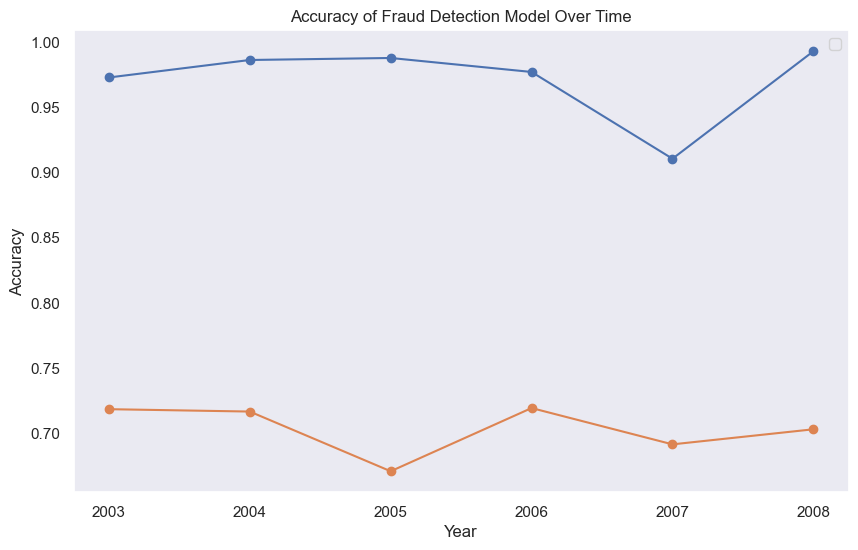

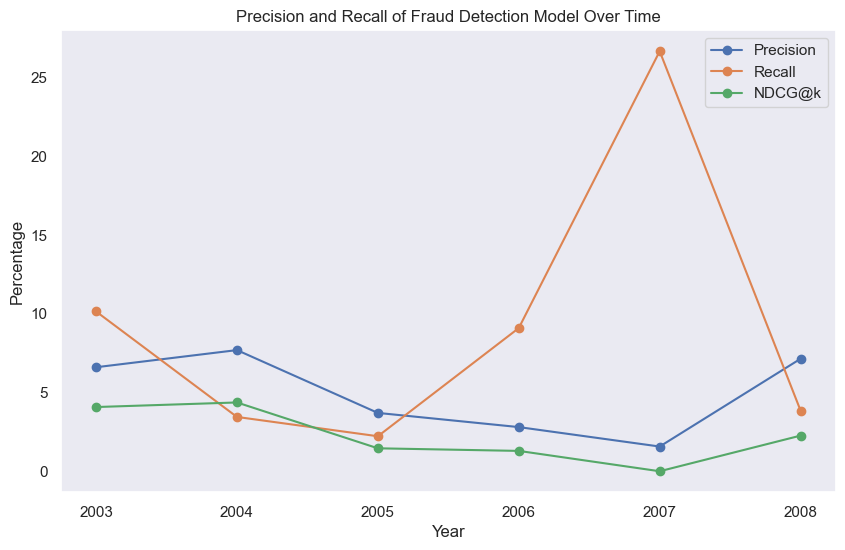

In [26]:
# Plot results for accuracy
plt.figure(figsize=(10, 6))
plt.plot(results['year'], results['accuracy'], marker='o')
plt.plot(results['year'], results['auc'], marker='o')
plt.title('Accuracy of Fraud Detection Model Over Time')
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot results for precision and recall on the same graph but convert to percentage
plt.figure(figsize=(10, 6))
plt.plot(results['year'], results['precision'] * 100, marker='o', label='Precision')
plt.plot(results['year'], results['recall'] * 100, marker='o', label='Recall')
plt.plot(results['year'], results['NDCG_at_k'] * 100, marker='o', label='NDCG@k')
plt.title('Precision and Recall of Fraud Detection Model Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid()




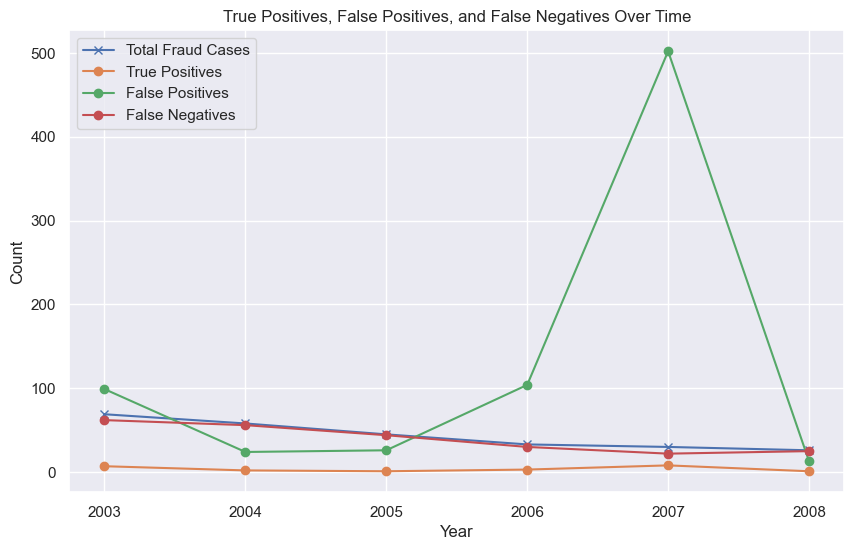

In [27]:
# Plot true positives, false positives, and false negatives compared to the overall number of fraud cases that year
plt.figure(figsize=(10, 6))
# selecting relevant years from finfraud_per_year
finfraud_per_year_plot = finfraud_per_year[(finfraud_per_year['fyear'] >= 2003) & (finfraud_per_year['fyear'] <= 2008)]
plt.plot(finfraud_per_year_plot['fyear'], finfraud_per_year_plot['misstate'], label='Total Fraud Cases', marker='x')
plt.plot(results['year'], results['true_positives'], label='True Positives', marker='o')
plt.plot(results['year'], results['false_positives'], label='False Positives', marker='o')
plt.plot(results['year'], results['false_negatives'], label='False Negatives', marker='o')
plt.title('True Positives, False Positives, and False Negatives Over Time')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


# SVM-FK

In [28]:
#export finfraud_copy to csv
finfraud_copy.to_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv', index=False)


In [29]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

# Load the data
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# keep only first 31 columns
finfraud_copy = finfraud_copy.iloc[:, :31]

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Define the financial kernel
def financial_kernel(X1, X2):
    n_features = X1.shape[1] // 2  # Assuming each feature has two years of data
    kernel = np.zeros((X1.shape[0], X2.shape[0]))

    for i in range(n_features):
        for j in range(i + 1, n_features):
            A1 = X1[:, i]
            A2 = X1[:, i + n_features]
            L1 = X1[:, j]
            L2 = X1[:, j + n_features]

            B1 = X2[:, i]
            B2 = X2[:, i + n_features]
            K1 = X2[:, j]
            K2 = X2[:, j + n_features]

            kernel += (A1 / L1)[:, None] * (B1 / K1)[None, :]
            kernel += (L1 / A1)[:, None] * (K1 / B1)[None, :]
            kernel += (L2 / A2)[:, None] * (K2 / B2)[None, :]
            kernel += (A2 / L2)[:, None] * (B2 / K2)[None, :]
            kernel += (A1 * L2 / (A2 * L1))[:, None] * (B1 * K2 / (B2 * K1))[None, :]
            kernel += (L1 * A2 / (L2 * A1))[:, None] * (K1 * B2 / (K2 * B1))[None, :]

    # deal with NaN values or zero division or infinity with median 
    kernel = np.nan_to_num(kernel, nan=np.nanmedian(kernel), posinf=np.nanmedian(kernel), neginf=np.nanmedian(kernel))
    
    return kernel

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train2 = X1_normalized_df[X1['fyear'] <= year - 2].values
    X_test = X1_normalized_df[X1['fyear'] == year].values
    y_train2 = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # print number of misstate = 1 and 0 in X_train2
    print(y_train2.value_counts())

    # pick same number of fraud and non-fraud cases for training and validation not using random 
    rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
    X_train, y_train = rus.fit_resample(X_train2, y_train2)

    # display x train and y train shape
    print(X_train.shape, y_train.shape)

    # Create an SVM model with a financial kernel
    model = SVC(kernel=financial_kernel, probability=True, random_state=10)

    # model without financial kernel
    #model = SVC(probability=True, random_state=10)
    

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

    # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

# Save the results to a CSV file
results.to_csv('SVM_FK_results.csv', index=False)


0    71234
1      514
Name: misstate, dtype: int64
(1028, 43) (1028,)


In [65]:
results5 = '/Users/ryanhuang/Developer/GraLNA/New/SVM-FK/SVM_FK2_results.csv'
# convert to float64
results5 = pd.read_csv(results5, dtype={'year': 'int64', 'auc': 'float64', 'accuracy': 'float64', 'precision': 'float64', 'recall': 'float64', 'true_positives': 'int64', 'false_positives': 'int64', 'false_negatives': 'int64'})

In [66]:


# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results5['auc'].mean()))
print("Average NDCG: {}".format(results5['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results5['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results5['sensitivity'].mean()))

# Compute the mean values
mean_auc = results5['auc'].mean()
mean_NDCG_at_k = results5['NDCG_at_k'].mean()
mean_precision = results5['precision_JAR'].mean() * 100
mean_sensitivity = results5['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML_results = ML_results.append({
    'method': 'SVM-FK',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)



Average AUC: 0.5026580504610454
Average NDCG: 0.00987342746428325
Average Precision: 0.011299435028248551
Average Sensitivity: 0.013213090424484717


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/1618778979.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_results = ML_results.append({


# Random Forest

In [162]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load the data
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train = X1_normalized_df[X1['fyear'] <= year - 2]
    X_test = X1_normalized_df[X1['fyear'] == year]
    y_train = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]



    # Create a Random Forest model
    model = RandomForestClassifier(random_state=42, 
                                   class_weight={0: 1, 1: class_weight_ratio}, 
                                   n_estimators=3000)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))
 

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC)
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k': NDCG_at_k, 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)


KeyboardInterrupt: 

### Data Summary

In [119]:
# read in results from server
results2 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RF/RandomForest_resultsNEW.csv')


In [120]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results2['auc'].mean()))
print("Average NDCG: {}".format(results2['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results2['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results2['sensitivity'].mean()))

# Compute the mean values
mean_auc = results2['auc'].mean()
mean_NDCG_at_k = results2['NDCG_at_k'].mean()
mean_precision = results2['precision_JAR'].mean() * 100
mean_sensitivity = results2['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML_results = ML_results.append({
    'method': 'Random Forest',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)

print(ML_results)


Average AUC: 0.789810464213882
Average NDCG: 0.08396210865207204
Average Precision: 0.060068255823661994
Average Sensitivity: 0.07689082809022833
          method    auc NDCG_at_k sensitivity precision
0          Logit  0.703     0.022      3.103%    2.562%
1  Random Forest  0.709     0.063      7.177%    5.714%
2        XGBoost  0.713     0.070      8.121%    6.546%
3            SVM  0.708     0.027      3.084%    2.285%
4       RUSBoost  0.751     0.029      2.996%    2.835%
5  Random Forest  0.790     0.084      7.689%    6.007%


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/1724829115.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_results = ML_results.append({


In [129]:
# reset index
results2 = results2.reset_index(drop=True)
print(ML_results)

          method    auc NDCG_at_k sensitivity precision
0          Logit  0.703     0.022      3.103%    2.562%
4       RUSBoost  0.751     0.029      2.996%    2.835%
5  Random Forest  0.790     0.084      7.689%    6.007%
3            SVM  0.708     0.027      3.084%    2.285%
2        XGBoost  0.713     0.070      8.121%    6.546%


# XGBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train = X1_normalized_df[X1['fyear'] <= year - 2]
    X_test = X1_normalized_df[X1['fyear'] == year]
    y_train = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # Calculate the class weight ratio
    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

    # Create an XGBoost classifier with class weights
    model = XGBClassifier(scale_pos_weight=class_weight_ratio, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))
    
    # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    # The AUC is a measure of how well the model can distinguish between classes.
    # An AUC of 1.0 is ideal, while an AUC of 0.5 indicates that the model is no better than random.
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

results.to_csv('~/GraLNA/New/XGBoost/XGBoost_results.csv', index=False)


In [31]:
results3 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/XGBoost/XGBoost_results.csv')


In [33]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results3['auc'].mean()))
print("Average NDCG: {}".format(results3['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results3['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results3['sensitivity'].mean()))

# Compute the mean values
mean_auc = results3['auc'].mean()
mean_NDCG_at_k = results3['NDCG_at_k'].mean()
mean_precision = results3['precision_JAR'].mean() * 100
mean_sensitivity = results3['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML_results = ML_results.append({
    'method': 'XGBoost',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)



Average AUC: 0.7132980145242523
Average NDCG: 0.07034072317485256
Average Precision: 0.06546401436085826
Average Sensitivity: 0.08120669657401287
          method    auc NDCG_at_k sensitivity precision
0          Logit  0.703    0.0224      3.103%    2.562%
1  Random Forest  0.709     0.063      7.177%    5.714%
2  Random Forest  0.713     0.070      8.121%    6.546%
3        XGBoost  0.713     0.070      8.121%    6.546%


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/3181845070.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_results = ML_results.append({


In [38]:
print(ML_results)

          method    auc NDCG_at_k sensitivity precision
0          Logit  0.703     0.022      3.103%    2.562%
1  Random Forest  0.709     0.063      7.177%    5.714%
2        XGBoost  0.713     0.070      8.121%    6.546%


# SVM

In [51]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

# Load the data
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)


# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train2 = X1_normalized_df[X1['fyear'] <= year - 2].values
    X_test = X1_normalized_df[X1['fyear'] == year].values
    y_train2 = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # print number of misstate = 1 and 0 in X_train2
    print(y_train2.value_counts())

    # pick same number of fraud and non-fraud cases for training and validation not using random 
    rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
    X_train, y_train = rus.fit_resample(X_train2, y_train2)

    # display x train and y train shape
    print(X_train.shape, y_train.shape)

    # without kernel
    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
    model = SVC(probability=True, random_state=42, class_weight={0: 1, 1: class_weight_ratio})

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

    # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

# Save the results to a CSV file
results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/SVM-FK/SVM_results.csv', index=False)


0    71234
1      514
Name: misstate, dtype: int64
(1028, 43) (1028,)
AUC for year 2003: 0.708451001157067
Sensitivity for year 2003: 0.043478260869565216
NDCG@59 for year 2003: 0.05205999851061258
Precision for year 2003: 0.05084745762711865


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2003: 0.901
Accuracy for year 2003: 0.9871258986791507
Precision for year 2003: 0.16666666666666666
Recall for year 2003: 0.028985507246376812
True Positives for year 2003: 2
False Positives for year 2003: 10
False Negatives for year 2003: 67
AUC for year 2003: 0.708451001157067
0    77224
1      591
Name: misstate, dtype: int64
(1182, 43) (1182,)
AUC for year 2004: 0.7259336635290251
Sensitivity for year 2004: 0.017241379310344827
NDCG@59 for year 2004: 0.029808513244925023
Precision for year 2004: 0.01694915254237288


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2004: 0.9450000000000001
Accuracy for year 2004: 0.9898887765419616
Precision for year 2004: 0.25
Recall for year 2004: 0.017241379310344827
True Positives for year 2004: 1
False Positives for year 2004: 3
False Negatives for year 2004: 57
AUC for year 2004: 0.7259336635290251
0    83136
1      660
Name: misstate, dtype: int64
(1320, 43) (1320,)
AUC for year 2005: 0.6912646575761048
Sensitivity for year 2005: 0.022222222222222223
NDCG@58 for year 2005: 0.02709278635527912
Precision for year 2005: 0.017241379310344827


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2005: 0.936
Accuracy for year 2005: 0.9918130649837967
Precision for year 2005: 0.2
Recall for year 2005: 0.022222222222222223
True Positives for year 2005: 1
False Positives for year 2005: 4
False Negatives for year 2005: 44
AUC for year 2005: 0.6912646575761048
0    89012
1      718
Name: misstate, dtype: int64
(1436, 43) (1436,)
AUC for year 2006: 0.7288459058671825
Sensitivity for year 2006: 0.030303030303030304
NDCG@59 for year 2006: 0.013970626118529521
Precision for year 2006: 0.01694915254237288


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2006: 0.906
Accuracy for year 2006: 0.9766418415707515
Precision for year 2006: 0.043478260869565216
Recall for year 2006: 0.15151515151515152
True Positives for year 2006: 5
False Positives for year 2006: 110
False Negatives for year 2006: 28
AUC for year 2006: 0.7288459058671825
0    94830
1      763
Name: misstate, dtype: int64
(1526, 43) (1526,)
AUC for year 2007: 0.7194701381751742
Sensitivity for year 2007: 0.03333333333333333
NDCG@58 for year 2007: 0.02209321568698976
Precision for year 2007: 0.017241379310344827


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2007: 0.963
Accuracy for year 2007: 0.9938650306748467
Precision for year 2007: 0.125
Recall for year 2007: 0.03333333333333333
True Positives for year 2007: 1
False Positives for year 2007: 7
False Negatives for year 2007: 29
AUC for year 2007: 0.7194701381751742
0    100705
1       796
Name: misstate, dtype: int64
(1592, 43) (1592,)
AUC for year 2008: 0.6720028092208543
Sensitivity for year 2008: 0.038461538461538464
NDCG@56 for year 2008: 0.0183638933029722
Precision for year 2008: 0.017857142857142856
Best threshold for year 2008: 0.898
Accuracy for year 2008: 0.9932287954383464
Precision for year 2008: 0.07142857142857142
Recall for year 2008: 0.038461538461538464
True Positives for year 2008: 1
False Positives for year 2008: 13
False Negatives for year 2008: 25
AUC for year 2008: 0.6720028092208543
     year       auc  accuracy  precision    recall  true_positives  \
0  2003.0  0.708451  0.987126   0.166667  0.028986             2.0   
1  2004.0  0.725934 

/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

In [55]:
results4 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/SVM-FK/SVM_results.csv')


In [56]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results4['auc'].mean()))
print("Average NDCG: {}".format(results4['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results4['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results4['sensitivity'].mean()))

# Compute the mean values
mean_auc = results4['auc'].mean()
mean_NDCG_at_k = results4['NDCG_at_k'].mean()
mean_precision = results4['precision_JAR'].mean() * 100
mean_sensitivity = results4['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML_results = ML_results.append({
    'method': 'SVM',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)



Average AUC: 0.7076613625875678
Average NDCG: 0.027231505536551334
Average Precision: 0.02284761069828277
Average Sensitivity: 0.0308399607500057


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2736687695.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_results = ML_results.append({


In [67]:

print(ML_results)

          method    auc NDCG_at_k sensitivity precision
0          Logit  0.703     0.022      3.103%    2.562%
1  Random Forest  0.709     0.063      7.177%    5.714%
2        XGBoost  0.713     0.070      8.121%    6.546%
3            SVM  0.708     0.027      3.084%    2.285%
4         SVM-FK  0.503     0.010      1.321%    1.130%


# RUSBoost

In [93]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Load the data
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train2 = X1_normalized_df[X1['fyear'] <= year - 2].values
    X_test = X1_normalized_df[X1['fyear'] == year].values
    y_train2 = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # Under-sample the majority class and fit the model
    rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
    X_train, y_train = rus.fit_resample(X_train2, y_train2)

    # Create a RUSBoost model
    base_estimator = DecisionTreeClassifier(max_depth=5)
    model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=3000, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k': NDCG_at_k, 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

# Save the results to a CSV file
results.to_csv('RUSBoost_results.csv', index=False)


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AUC for year 2003: 0.7789046106175599
Sensitivity for year 2003: 0.07246376811594203
NDCG@59 for year 2003: 0.10358813365941079
Precision for year 2003: 0.0847457627118644


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2003: 0.987
Accuracy for year 2003: 0.9884634676475506
Precision for year 2003: 0.5
Recall for year 2003: 0.014492753623188406
True Positives for year 2003: 1
False Positives for year 2003: 1
False Negatives for year 2003: 68
AUC for year 2003: 0.7789046106175599
AUC for year 2004: 0.7880624867960846
Sensitivity for year 2004: 0.05172413793103448
NDCG@59 for year 2004: 0.041119214811831714
Precision for year 2004: 0.05084745762711865


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2004: 0.925
Accuracy for year 2004: 0.9740478597910347
Precision for year 2004: 0.08620689655172414
Recall for year 2004: 0.1724137931034483
True Positives for year 2004: 10
False Positives for year 2004: 106
False Negatives for year 2004: 48
AUC for year 2004: 0.7880624867960846
AUC for year 2005: 0.7491959818188764
Sensitivity for year 2005: 0.022222222222222223
NDCG@58 for year 2005: 0.016486589412556464
Precision for year 2005: 0.017241379310344827


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2005: 0.9420000000000001
Accuracy for year 2005: 0.9895957700835749
Precision for year 2005: 0.05555555555555555
Recall for year 2005: 0.022222222222222223
True Positives for year 2005: 1
False Positives for year 2005: 17
False Negatives for year 2005: 44
AUC for year 2005: 0.7491959818188764
AUC for year 2006: 0.7544397163120568
Sensitivity for year 2006: 0.0
NDCG@59 for year 2006: 0.0
Precision for year 2006: 0.0


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2006: 0.839
Accuracy for year 2006: 0.9656398104265402
Precision for year 2006: 0.02247191011235955
Recall for year 2006: 0.12121212121212122
True Positives for year 2006: 4
False Positives for year 2006: 174
False Negatives for year 2006: 29
AUC for year 2006: 0.7544397163120568
AUC for year 2007: 0.7340413383578851
Sensitivity for year 2007: 0.03333333333333333
NDCG@58 for year 2007: 0.012059506902607674
Precision for year 2007: 0.017241379310344827


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2007: 0.8210000000000001
Accuracy for year 2007: 0.9405248807089298
Precision for year 2007: 0.023880597014925373
Recall for year 2007: 0.26666666666666666
True Positives for year 2007: 8
False Positives for year 2007: 327
False Negatives for year 2007: 22
AUC for year 2007: 0.7340413383578851
AUC for year 2008: 0.699681897050318
Sensitivity for year 2008: 0.0
NDCG@56 for year 2008: 0.0
Precision for year 2008: 0.0
Best threshold for year 2008: 0.74
Accuracy for year 2008: 0.9422665716322167
Precision for year 2008: 0.016233766233766232
Recall for year 2008: 0.19230769230769232
True Positives for year 2008: 5
False Positives for year 2008: 303
False Negatives for year 2008: 21
AUC for year 2008: 0.699681897050318
     year       auc  accuracy  precision    recall  true_positives  \
0  2003.0  0.778905  0.988463   0.500000  0.014493             1.0   
1  2004.0  0.788062  0.974048   0.086207  0.172414            10.0   
2  2005.0  0.749196  0.989596   0.055556  0

/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

In [94]:
results6 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RUSBoost_results.csv')


In [95]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results6['auc'].mean()))
print("Average NDCG: {}".format(results6['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results6['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results6['sensitivity'].mean()))

# Compute the mean values
mean_auc = results6['auc'].mean()
mean_NDCG_at_k = results6['NDCG_at_k'].mean()
mean_precision = results6['precision_JAR'].mean() * 100
mean_sensitivity = results6['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML_results = ML_results.append({
    'method': 'RUSBoost',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)



Average AUC: 0.7507210051587968
Average NDCG: 0.02887557413106773
Average Precision: 0.028345996493278767
Average Sensitivity: 0.029957243600421984


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/1335253936.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML_results = ML_results.append({


In [97]:
#drop row 4
print(ML_results)

# output to latex table
print(ML_results.to_latex(index=False))

          method    auc NDCG_at_k sensitivity precision
0          Logit  0.703     0.022      3.103%    2.562%
1  Random Forest  0.709     0.063      7.177%    5.714%
2        XGBoost  0.713     0.070      8.121%    6.546%
3            SVM  0.708     0.027      3.084%    2.285%
5       RUSBoost  0.751     0.029      2.996%    2.835%
\begin{tabular}{lllll}
\toprule
       method &   auc & NDCG\_at\_k & sensitivity & precision \\
\midrule
        Logit & 0.703 &     0.022 &      3.103\% &    2.562\% \\
Random Forest & 0.709 &     0.063 &      7.177\% &    5.714\% \\
      XGBoost & 0.713 &     0.070 &      8.121\% &    6.546\% \\
          SVM & 0.708 &     0.027 &      3.084\% &    2.285\% \\
     RUSBoost & 0.751 &     0.029 &      2.996\% &    2.835\% \\
\bottomrule
\end{tabular}



/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/546346944.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ML_results.to_latex(index=False))


# LOGIT 28

In [85]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# only use the first 31 columns
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

finfraud_copy = finfraud_copy.iloc[:, :31]

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train = X1_normalized_df[X1['fyear'] <= year - 2]
    X_test = X1_normalized_df[X1['fyear'] == year]
    y_train = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # Calculate the class weight ratio
    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

    # Create a logistic regression model with class weights
    model = LogisticRegression(random_state=42, class_weight={0: 1, 1: class_weight_ratio})

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

  # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    # The AUC is a measure of how well the model can distinguish between classes.
    # An AUC of 1.0 is ideal, while an AUC of 0.5 indicates that the model is no better than random.
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/Logit_results_28.csv', index=False)


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC for year 2003: 0.7418662116844149
Sensitivity for year 2003: 0.057971014492753624
NDCG@59 for year 2003: 0.05814584338130735
Precision for year 2003: 0.06779661016949153
Best threshold for year 2003: 0.998
Accuracy for year 2003: 0.9839491723792008
Precision for year 2003: 0.09090909090909091
Recall for year 2003: 0.043478260869565216
True Positives for year 2003: 3
False Positives for year 2003: 30
False Negatives for year 2003: 66
AUC for year 2003: 0.7418662116844149


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2756481080.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2004: 0.665503744043567
Sensitivity for year 2004: 0.05172413793103448
NDCG@59 for year 2004: 0.04797998253233412
Precision for year 2004: 0.05084745762711865
Best threshold for year 2004: 0.999
Accuracy for year 2004: 0.9865183687226154
Precision for year 2004: 0.07692307692307693
Recall for year 2004: 0.034482758620689655
True Positives for year 2004: 2
False Positives for year 2004: 24
False Negatives for year 2004: 56
AUC for year 2004: 0.665503744043567


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2756481080.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2005: 0.6295366869103549
Sensitivity for year 2005: 0.022222222222222223
NDCG@58 for year 2005: 0.015704655381585848
Precision for year 2005: 0.017241379310344827
Best threshold for year 2005: 0.999
Accuracy for year 2005: 0.9885724032065496
Precision for year 2005: 0.041666666666666664
Recall for year 2005: 0.022222222222222223
True Positives for year 2005: 1
False Positives for year 2005: 23
False Negatives for year 2005: 44
AUC for year 2005: 0.6295366869103549


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2756481080.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2006: 0.640361057382334
Sensitivity for year 2006: 0.030303030303030304
NDCG@59 for year 2006: 0.013604664354305735
Precision for year 2006: 0.01694915254237288
Best threshold for year 2006: 0.998
Accuracy for year 2006: 0.9888287068381855
Precision for year 2006: 0.02857142857142857
Recall for year 2006: 0.030303030303030304
True Positives for year 2006: 1
False Positives for year 2006: 34
False Negatives for year 2006: 32
AUC for year 2006: 0.640361057382334


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2756481080.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2007: 0.5970138175174147
Sensitivity for year 2007: 0.0
NDCG@58 for year 2007: 0.0
Precision for year 2007: 0.0
Best threshold for year 2007: 0.667
Accuracy for year 2007: 0.8849693251533742
Precision for year 2007: 0.0091324200913242
Recall for year 2007: 0.2
True Positives for year 2007: 6
False Positives for year 2007: 651
False Negatives for year 2007: 24
AUC for year 2007: 0.5970138175174147


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2756481080.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

AUC for year 2008: 0.5662094797433144
Sensitivity for year 2008: 0.038461538461538464
NDCG@56 for year 2008: 0.025556341836377245
Precision for year 2008: 0.017857142857142856
Best threshold for year 2008: 0.999
Accuracy for year 2008: 0.9903777619387027
Precision for year 2008: 0.03333333333333333
Recall for year 2008: 0.038461538461538464
True Positives for year 2008: 1
False Positives for year 2008: 29
False Negatives for year 2008: 25
AUC for year 2008: 0.5662094797433144
     year       auc  accuracy  precision    recall  true_positives  \
0  2003.0  0.741866  0.983949   0.090909  0.043478             3.0   
1  2004.0  0.665504  0.986518   0.076923  0.034483             2.0   
2  2005.0  0.629537  0.988572   0.041667  0.022222             1.0   
3  2006.0  0.640361  0.988829   0.028571  0.030303             1.0   
4  2007.0  0.597014  0.884969   0.009132  0.200000             6.0   
5  2008.0  0.566209  0.990378   0.033333  0.038462             1.0   

   false_positives  false_ne

/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2756481080.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)


In [89]:
results7 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/Logit_results_28.csv')

#define results dataframe with method, average auc, ndcg, precision, and sensitivity
ML28_results = pd.DataFrame(columns=['method', 'auc', 'NDCG_at_k', 'precision_JAR', 'sensitivity'])

# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results7['auc'].mean()))
print("Average NDCG: {}".format(results7['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results7['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results7['sensitivity'].mean()))

# Compute the mean values
mean_auc = results7['auc'].mean()
mean_NDCG_at_k = results7['NDCG_at_k'].mean()
mean_precision = results7['precision_JAR'].mean() * 100
mean_sensitivity = results7['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML28_results = ML28_results.append({
    'method': 'Logit',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)
 

Average AUC: 0.6400818328802332
Average NDCG: 0.02683191458098502
Average Precision: 0.028448623751078417
Average Sensitivity: 0.03344699056842982


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2407346528.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML28_results = ML28_results.append({


In [91]:
# drop precision_JAR column
ML28_results = ML28_results.drop(columns=['precision_JAR'])
print(ML28_results)

  method    auc NDCG_at_k sensitivity precision
0  Logit  0.640     0.027      3.345%    2.845%


# RUSBOOST 28

In [99]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Load the data
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# Keep only the first 31 columns
finfraud_copy = finfraud_copy.iloc[:, :31]

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train2 = X1_normalized_df[X1['fyear'] <= year - 2].values
    X_test = X1_normalized_df[X1['fyear'] == year].values
    y_train2 = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # Under-sample the majority class and fit the model
    rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
    X_train, y_train = rus.fit_resample(X_train2, y_train2)

    # Create a RUSBoost model
    base_estimator = DecisionTreeClassifier(max_depth=5)
    model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=3000, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k': NDCG_at_k, 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

# Save the results to a CSV file
results.to_csv('RUSBoost_results28.csv', index=False)


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AUC for year 2003: 0.7935665117373655
Sensitivity for year 2003: 0.14492753623188406
NDCG@59 for year 2003: 0.14976508508194938
Precision for year 2003: 0.1694915254237288


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2003: 0.992
Accuracy for year 2003: 0.9877946831633506
Precision for year 2003: 0.16666666666666666
Recall for year 2003: 0.014492753623188406
True Positives for year 2003: 1
False Positives for year 2003: 5
False Negatives for year 2003: 68
AUC for year 2003: 0.7935665117373655
AUC for year 2004: 0.8055503391939156
Sensitivity for year 2004: 0.08620689655172414
NDCG@59 for year 2004: 0.11041087035388962
Precision for year 2004: 0.0847457627118644


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2004: 0.981
Accuracy for year 2004: 0.9897202561509942
Precision for year 2004: 0.2857142857142857
Recall for year 2004: 0.034482758620689655
True Positives for year 2004: 2
False Positives for year 2004: 5
False Negatives for year 2004: 56
AUC for year 2004: 0.8055503391939156
AUC for year 2005: 0.7857874030785684
Sensitivity for year 2005: 0.06666666666666667
NDCG@58 for year 2005: 0.04769782001506326
Precision for year 2005: 0.05172413793103448


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2005: 0.9560000000000001
Accuracy for year 2005: 0.9899368923759168
Precision for year 2005: 0.1111111111111111
Recall for year 2005: 0.044444444444444446
True Positives for year 2005: 2
False Positives for year 2005: 16
False Negatives for year 2005: 43
AUC for year 2005: 0.7857874030785684
AUC for year 2006: 0.7898491295938105
Sensitivity for year 2006: 0.0
NDCG@59 for year 2006: 0.0
Precision for year 2006: 0.0


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2006: 0.756
Accuracy for year 2006: 0.9306025727826676
Precision for year 2006: 0.02518891687657431
Recall for year 2006: 0.30303030303030304
True Positives for year 2006: 10
False Positives for year 2006: 387
False Negatives for year 2006: 23
AUC for year 2006: 0.7898491295938105
AUC for year 2007: 0.7384834989151536
Sensitivity for year 2007: 0.0
NDCG@58 for year 2007: 0.0
Precision for year 2007: 0.0


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2007: 0.748
Accuracy for year 2007: 0.8945126107702794
Precision for year 2007: 0.016420361247947456
Recall for year 2007: 0.3333333333333333
True Positives for year 2007: 10
False Positives for year 2007: 599
False Negatives for year 2007: 20
AUC for year 2007: 0.7384834989151536
AUC for year 2008: 0.704536065438321
Sensitivity for year 2008: 0.0
NDCG@56 for year 2008: 0.0
Precision for year 2008: 0.0
Best threshold for year 2008: 0.749
Accuracy for year 2008: 0.9542052744119743
Precision for year 2008: 0.016736401673640166
Recall for year 2008: 0.15384615384615385
True Positives for year 2008: 4
False Positives for year 2008: 235
False Negatives for year 2008: 22
AUC for year 2008: 0.704536065438321
     year       auc  accuracy  precision    recall  true_positives  \
0  2003.0  0.793567  0.987795   0.166667  0.014493             1.0   
1  2004.0  0.805550  0.989720   0.285714  0.034483             2.0   
2  2005.0  0.785787  0.989937   0.111111  0.044444     

/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

In [100]:
results7 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RUSBoost_results28.csv')


In [101]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results7['auc'].mean()))
print("Average NDCG: {}".format(results7['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results7['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results7['sensitivity'].mean()))

# Compute the mean values
mean_auc = results7['auc'].mean()
mean_NDCG_at_k = results7['NDCG_at_k'].mean()
mean_precision = results7['precision_JAR'].mean() * 100
mean_sensitivity = results7['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML28_results = ML28_results.append({
    'method': 'RUSBoost',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)



Average AUC: 0.7696288246595224
Average NDCG: 0.051312295908483685
Average Precision: 0.050993571011104605
Average Sensitivity: 0.049633516575045784


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/4106735896.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML28_results = ML28_results.append({


In [103]:
#drop row 4
print(ML28_results)

     method    auc NDCG_at_k sensitivity precision
0     Logit  0.640     0.027      3.345%    2.845%
1  RUSBoost  0.770     0.051      4.963%    5.099%


# SVM 28

In [104]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

# Load the data
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# take first 31 columns
finfraud_copy = finfraud_copy.iloc[:, :31]

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)


# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train2 = X1_normalized_df[X1['fyear'] <= year - 2].values
    X_test = X1_normalized_df[X1['fyear'] == year].values
    y_train2 = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # print number of misstate = 1 and 0 in X_train2
    print(y_train2.value_counts())

    # pick same number of fraud and non-fraud cases for training and validation not using random 
    rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
    X_train, y_train = rus.fit_resample(X_train2, y_train2)

    # display x train and y train shape
    print(X_train.shape, y_train.shape)

    # without kernel
    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
    model = SVC(probability=True, random_state=42, class_weight={0: 1, 1: class_weight_ratio})

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

    # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

# Save the results to a CSV file
results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/SVM-FK/SVM_results28.csv', index=False)


0    71234
1      514
Name: misstate, dtype: int64
(1028, 28) (1028,)
AUC for year 2003: 0.7324822027416603
Sensitivity for year 2003: 0.057971014492753624
NDCG@59 for year 2003: 0.07480041823613448
Precision for year 2003: 0.06779661016949153


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2003: 0.913
Accuracy for year 2003: 0.9877946831633506
Precision for year 2003: 0.25
Recall for year 2003: 0.028985507246376812
True Positives for year 2003: 2
False Positives for year 2003: 6
False Negatives for year 2003: 67
AUC for year 2003: 0.7324822027416603
0    77224
1      591
Name: misstate, dtype: int64
(1182, 28) (1182,)
AUC for year 2004: 0.7102298068120467
Sensitivity for year 2004: 0.034482758620689655
NDCG@59 for year 2004: 0.02811818115000836
Precision for year 2004: 0.03389830508474576


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2004: 0.928
Accuracy for year 2004: 0.9850016852039096
Precision for year 2004: 0.05714285714285714
Recall for year 2004: 0.034482758620689655
True Positives for year 2004: 2
False Positives for year 2004: 33
False Negatives for year 2004: 56
AUC for year 2004: 0.7102298068120467
0    83136
1      660
Name: misstate, dtype: int64
(1320, 28) (1320,)
AUC for year 2005: 0.6693518200221535
Sensitivity for year 2005: 0.022222222222222223
NDCG@58 for year 2005: 0.014568060379130698
Precision for year 2005: 0.017241379310344827


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2005: 0.918
Accuracy for year 2005: 0.9798737847518335
Precision for year 2005: 0.04938271604938271
Recall for year 2005: 0.08888888888888889
True Positives for year 2005: 4
False Positives for year 2005: 77
False Negatives for year 2005: 41
AUC for year 2005: 0.6693518200221535
0    89012
1      718
Name: misstate, dtype: int64
(1436, 28) (1436,)
AUC for year 2006: 0.6194352030947776
Sensitivity for year 2006: 0.030303030303030304
NDCG@59 for year 2006: 0.013005291153163984
Precision for year 2006: 0.01694915254237288


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2006: 0.912
Accuracy for year 2006: 0.9881516587677726
Precision for year 2006: 0.02564102564102564
Recall for year 2006: 0.030303030303030304
True Positives for year 2006: 1
False Positives for year 2006: 38
False Negatives for year 2006: 32
AUC for year 2006: 0.6194352030947776
0    94830
1      763
Name: misstate, dtype: int64
(1526, 28) (1526,)
AUC for year 2007: 0.5471679799017929
Sensitivity for year 2007: 0.0
NDCG@58 for year 2007: 0.0
Precision for year 2007: 0.0


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2007: 0.898
Accuracy for year 2007: 0.9487048398091343
Precision for year 2007: 0.014336917562724014
Recall for year 2007: 0.13333333333333333
True Positives for year 2007: 4
False Positives for year 2007: 275
False Negatives for year 2007: 26
AUC for year 2007: 0.5471679799017929
0    100705
1       796
Name: misstate, dtype: int64
(1592, 28) (1592,)
AUC for year 2008: 0.5507036822826297
Sensitivity for year 2008: 0.038461538461538464
NDCG@56 for year 2008: 0.012409835332733496
Precision for year 2008: 0.017857142857142856
Best threshold for year 2008: 0.873
Accuracy for year 2008: 0.9861012116892374
Precision for year 2008: 0.018518518518518517
Recall for year 2008: 0.038461538461538464
True Positives for year 2008: 1
False Positives for year 2008: 53
False Negatives for year 2008: 25
AUC for year 2008: 0.5507036822826297
     year       auc  accuracy  precision    recall  true_positives  \
0  2003.0  0.732482  0.987795   0.250000  0.028986             2.0   


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

In [105]:
results8 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/SVM-FK/SVM_results28.csv')


In [106]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results8['auc'].mean()))
print("Average NDCG: {}".format(results8['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results8['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results8['sensitivity'].mean()))

# Compute the mean values
mean_auc = results8['auc'].mean()
mean_NDCG_at_k = results8['NDCG_at_k'].mean()
mean_precision = results8['precision_JAR'].mean() * 100
mean_sensitivity = results8['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML28_results = ML28_results.append({
    'method': 'SVM',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)



Average AUC: 0.6382284491425101
Average NDCG: 0.023816964375195097
Average Precision: 0.025623764994016265
Average Sensitivity: 0.030573427350039015


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/4252570618.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML28_results = ML28_results.append({


In [107]:
print(ML28_results)

     method    auc NDCG_at_k sensitivity precision
0     Logit  0.640     0.027      3.345%    2.845%
1  RUSBoost  0.770     0.051      4.963%    5.099%
2       SVM  0.638     0.024      3.057%    2.562%


# XGBOOST 28

In [110]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:00a 0:00:01


In [112]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# Load the data
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# keep first 31 columns
finfraud_copy = finfraud_copy.iloc[:, :31]

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train = X1_normalized_df[X1['fyear'] <= year - 2]
    X_test = X1_normalized_df[X1['fyear'] == year]
    y_train = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    # Calculate the class weight ratio
    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

    # Create an XGBoost classifier with class weights
    model = XGBClassifier(scale_pos_weight=class_weight_ratio, random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))
    
    # Predict probabilities for the test set
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba_test)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC).
    # The AUC is a measure of how well the model can distinguish between classes.
    # An AUC of 1.0 is ideal, while an AUC of 0.5 indicates that the model is no better than random.
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k' : NDCG_at_k , 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)




results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/XGBoost/XGBoost_results28.csv', index=False)


AUC for year 2003: 0.7879111019591692
Sensitivity for year 2003: 0.10144927536231885
NDCG@59 for year 2003: 0.21546583875326028
Precision for year 2003: 0.11864406779661017


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2003: 0.973
Accuracy for year 2003: 0.9889650560107005
Precision for year 2003: 1.0
Recall for year 2003: 0.043478260869565216
True Positives for year 2003: 3
False Positives for year 2003: 0
False Negatives for year 2003: 66
AUC for year 2003: 0.7879111019591692
AUC for year 2004: 0.7644274782282107
Sensitivity for year 2004: 0.1724137931034483
NDCG@59 for year 2004: 0.18063806942302502
Precision for year 2004: 0.1694915254237288


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2004: 0.874
Accuracy for year 2004: 0.9898887765419616
Precision for year 2004: 0.4166666666666667
Recall for year 2004: 0.08620689655172414
True Positives for year 2004: 5
False Positives for year 2004: 7
False Negatives for year 2004: 53
AUC for year 2004: 0.7644274782282107
AUC for year 2005: 0.7460448416790803
Sensitivity for year 2005: 0.06666666666666667
NDCG@58 for year 2005: 0.05490252870104503
Precision for year 2005: 0.05172413793103448


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2005: 0.863
Accuracy for year 2005: 0.9907896981067713
Precision for year 2005: 0.15384615384615385
Recall for year 2005: 0.044444444444444446
True Positives for year 2005: 2
False Positives for year 2005: 11
False Negatives for year 2005: 43
AUC for year 2005: 0.7460448416790803
AUC for year 2006: 0.7968175370728563
Sensitivity for year 2006: 0.06060606060606061
NDCG@59 for year 2006: 0.028367987139793455
Precision for year 2006: 0.03389830508474576


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2006: 0.6960000000000001
Accuracy for year 2006: 0.9900135409614083
Precision for year 2006: 0.06666666666666667
Recall for year 2006: 0.06060606060606061
True Positives for year 2006: 2
False Positives for year 2006: 28
False Negatives for year 2006: 31
AUC for year 2006: 0.7968175370728563
AUC for year 2007: 0.7290567545963229
Sensitivity for year 2007: 0.1
NDCG@58 for year 2007: 0.04195066113644149
Precision for year 2007: 0.05172413793103448


/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

Best threshold for year 2007: 0.677
Accuracy for year 2007: 0.9904567143830948
Precision for year 2007: 0.06666666666666667
Recall for year 2007: 0.06666666666666667
True Positives for year 2007: 2
False Positives for year 2007: 28
False Negatives for year 2007: 28
AUC for year 2007: 0.7290567545963229
AUC for year 2008: 0.7341843620039109
Sensitivity for year 2008: 0.07692307692307693
NDCG@56 for year 2008: 0.07302154470896056
Precision for year 2008: 0.03571428571428571
Best threshold for year 2008: 0.728
Accuracy for year 2008: 0.9953670705630792
Precision for year 2008: 0.5
Recall for year 2008: 0.038461538461538464
True Positives for year 2008: 1
False Positives for year 2008: 1
False Negatives for year 2008: 25
AUC for year 2008: 0.7341843620039109
     year       auc  accuracy  precision    recall  true_positives  \
0  2003.0  0.787911  0.988965   1.000000  0.043478             3.0   
1  2004.0  0.764427  0.989889   0.416667  0.086207             5.0   
2  2005.0  0.746045  0.99

/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryanhuang/Library/Python/3.9/lib/python/site-packages/skl

In [114]:
results9 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/XGBoost/XGBoost_results28.csv')

In [115]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results9['auc'].mean()))
print("Average NDCG: {}".format(results9['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results9['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results9['sensitivity'].mean()))

# Compute the mean values
mean_auc = results9['auc'].mean()
mean_NDCG_at_k = results9['NDCG_at_k'].mean()
mean_precision = results9['precision_JAR'].mean() * 100
mean_sensitivity = results9['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML28_results = ML28_results.append({
    'method': 'XGBoost',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)



Average AUC: 0.7597403459232585
Average NDCG: 0.09905777164375423
Average Precision: 0.07686607664690652
Average Sensitivity: 0.0963431454435952


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/3997873007.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML28_results = ML28_results.append({


In [116]:
print(ML28_results)

     method    auc NDCG_at_k sensitivity precision
0     Logit  0.640     0.027      3.345%    2.845%
1  RUSBoost  0.770     0.051      4.963%    5.099%
2       SVM  0.638     0.024      3.057%    2.562%
3   XGBoost  0.760     0.099      9.634%    7.687%


# Random Forest 28

In [117]:
import pandas as pd
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the results DataFrame
results = pd.DataFrame(columns=['year', 'auc', 'accuracy', 'precision', 'recall', 'true_positives', 'false_positives', 'false_negatives'])

# load the data
finfraud_copy = pd.read_csv('~/GraLNA/New/finfraud_copy.csv')

# keep first 31 columns
finfraud_copy = finfraud_copy.iloc[:, :31]

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003 initially, then fyear 2004 but also expand training data to go up one year every time as well
for year in range(2003, 2009):
    X_train = X1_normalized_df[X1['fyear'] <= year - 2]
    X_test = X1_normalized_df[X1['fyear'] == year]
    y_train = y1[X1['fyear'] <= year - 2]
    y_test = y1[X1['fyear'] == year]

    class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

    # Create a Random Forest model
    model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: class_weight_ratio}, n_estimators=3000)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_proba)
    print("AUC for year {}: {}".format(year, auc))

    # Rank the instances based on predicted probabilities
    ranked_indices = np.argsort(y_proba)[::-1]  # Descending order

    # Define k (e.g., top 1%)
    k = int(len(y_test) * 0.01)

    # Select the top k instances
    top_k_indices = ranked_indices[:k]

    # Calculate true positives (TP) in the top 1%
    TP = y_test.iloc[top_k_indices].sum()

    # Calculate false positives (FP) in the top 1%
    FP = k - TP

    # Calculate false negatives (FN) in the bottom 99%
    FN = y_test.iloc[ranked_indices[k:]].sum()

    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    print("Sensitivity for year {}: {}".format(year, sensitivity))

    # Calculate DCG@k
    DCG_at_k = sum((2 ** y_test.iloc[ranked_indices[i]] - 1) / np.log2(i + 2) for i in range(k))

    # Ideal DCG@k (when all true frauds are ranked at the top)
    ideal_DCG_at_k = sum((2 ** 1 - 1) / np.log2(i + 2) for i in range(k)) 

    # Calculate NDCG@k
    NDCG_at_k = DCG_at_k / ideal_DCG_at_k if ideal_DCG_at_k != 0 else 0
    print("NDCG@{} for year {}: {}".format(k, year, NDCG_at_k))

    # Calculate Precision
    precision2 = TP / (TP + FP)
    print("Precision for year {}: {}".format(year, precision2))

    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)

    # Find optimal threshold based on precision and recall
    thresholds = np.arange(0, 1, 0.001)
    scores = [precision_score(y_test, (y_pred_prob[:,1] > threshold).astype(int)) for threshold in thresholds]
    best_threshold = thresholds[scores.index(max(scores))]
    print(f'Best threshold for year {year}: {best_threshold}')

    # Convert probabilities to binary predictions based on the optimal threshold
    y_pred = (y_pred_prob[:,1] > best_threshold).astype(int)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for year {year}: {accuracy}')

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Precision for year {year}: {precision}')
    print(f'Recall for year {year}: {recall}')

    # Calculate true positives, false positives, and false negatives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f'True Positives for year {year}: {tp}')
    print(f'False Positives for year {year}: {fp}')
    print(f'False Negatives for year {year}: {fn}')

    # Calculate Area under the receiver operating characteristics (ROC) curve (AUC)
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f'AUC for year {year}: {auc}')

    # Add results to DataFrame
    results = results.append({'year': year, 'auc': auc, 'accuracy': accuracy, 'NDCG_at_k': NDCG_at_k, 'precision': precision, 'precision_JAR': precision2, 'sensitivity': sensitivity, 'recall': recall, 'true_positives': tp, 'false_positives': fp, 'false_negatives': fn}, ignore_index=True)

print(results)

results.to_csv('~/GraLNA/New/RandomForest/RandomForest_results28.csv', index=False)


KeyboardInterrupt: 

In [124]:
results10 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RF/RandomForest_results28.csv')

In [125]:
# average auc, ndcg, precision, sensitivity
print("Average AUC: {}".format(results10['auc'].mean()))
print("Average NDCG: {}".format(results10['NDCG_at_k'].mean()))
print("Average Precision: {}".format(results10['precision_JAR'].mean()))
print("Average Sensitivity: {}".format(results10['sensitivity'].mean()))

# Compute the mean values
mean_auc = results10['auc'].mean()
mean_NDCG_at_k = results10['NDCG_at_k'].mean()
mean_precision = results10['precision_JAR'].mean() * 100
mean_sensitivity = results10['sensitivity'].mean() * 100

# Append the formatted results to the DataFrame
ML28_results = ML28_results.append({
    'method': 'Random Forest',
    'auc': f'{mean_auc:.3f}',
    'NDCG_at_k': f'{mean_NDCG_at_k:.3f}',
    'precision': f'{mean_precision:.3f}%',
    'sensitivity': f'{mean_sensitivity:.3f}%'
}, ignore_index=True)



Average AUC: 0.7975902087093655
Average NDCG: 0.1428974240184241
Average Precision: 0.1170629122484762
Average Sensitivity: 0.15191685431565488


/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/2373276609.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ML28_results = ML28_results.append({


In [128]:
# make sure both are alphabetical
ML_results = ML_results.sort_values('method')
ML28_results = ML28_results.sort_values('method')



          method    auc NDCG_at_k sensitivity precision
0          Logit  0.640     0.027      3.345%    2.845%
1       RUSBoost  0.770     0.051      4.963%    5.099%
4  Random Forest  0.798     0.143     15.192%   11.706%
2            SVM  0.638     0.024      3.057%    2.562%
3        XGBoost  0.760     0.099      9.634%    7.687%

          method    auc NDCG_at_k sensitivity precision
0          Logit  0.703     0.022      3.103%    2.562%
4       RUSBoost  0.751     0.029      2.996%    2.835%
5  Random Forest  0.790     0.084      7.689%    6.007%
3            SVM  0.708     0.027      3.084%    2.285%
2        XGBoost  0.713     0.070      8.121%    6.546%


In [141]:
#reset index
ML28_results.reset_index(drop=True, inplace=True)
ML_results.reset_index(drop=True, inplace=True)
print(ML28_results)
print("")
print(ML_results)

#save to csv
ML_results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/ML_results.csv', index=False)
ML28_results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/ML28_results.csv', index=False)

          method    auc NDCG_at_k  sensitivity  precision
0          Logit  0.640     0.027      0.03345    0.02845
1       RUSBoost  0.770     0.051      0.04963    0.05099
2  Random Forest  0.798     0.143      0.15192    0.11706
3            SVM  0.638     0.024      0.03057    0.02562
4        XGBoost  0.760     0.099      0.09634    0.07687

          method    auc NDCG_at_k  sensitivity  precision
0          Logit  0.703     0.022      0.03103    0.02562
1       RUSBoost  0.751     0.029      0.02996    0.02835
2  Random Forest  0.790     0.084      0.07689    0.06007
3            SVM  0.708     0.027      0.03084    0.02285
4        XGBoost  0.713     0.070      0.08121    0.06546


In [148]:
ML_results = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/ML_results.csv')
ML28_results = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/ML28_results.csv')

In [153]:
ML_results = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/ML_results.csv')
ML28_results = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/ML28_results.csv')

# calculate percentage change for each cell in the dataframe from ML28 to ML
ML_results['auc'] = ML_results['auc'].astype(float)
ML_results['NDCG_at_k'] = ML_results['NDCG_at_k'].astype(float)
ML_results['precision'] = ML_results['precision'].astype('float')
ML_results['sensitivity'] = ML_results['sensitivity'].astype('float')

ML28_results['auc'] = ML28_results['auc'].astype(float)
ML28_results['NDCG_at_k'] = ML28_results['NDCG_at_k'].astype(float)
ML28_results['precision'] = ML28_results['precision'].astype('float')
ML28_results['sensitivity'] = ML28_results['sensitivity'].astype('float')

# calculate percentage change
ML_results['auc_change'] = ((ML_results['auc'] - ML28_results['auc']) / ML28_results['auc']) * 100
ML_results['NDCG_at_k_change'] = ((ML_results['NDCG_at_k'] - ML28_results['NDCG_at_k']) / ML28_results['NDCG_at_k']) * 100
ML_results['precision_change'] = ((ML_results['precision'] - ML28_results['precision']) / ML28_results['precision']) * 100
ML_results['sensitivity_change'] = ((ML_results['sensitivity'] - ML28_results['sensitivity']) / ML28_results['sensitivity']) * 100

# format the percentage change columns to 3 decimal places
ML_results['auc_change'] = ML_results['auc_change'].map("{:.3f}%".format)
ML_results['NDCG_at_k_change'] = ML_results['NDCG_at_k_change'].map("{:.3f}%".format)
ML_results['precision_change'] = ML_results['precision_change'].map("{:.3f}%".format)
ML_results['sensitivity_change'] = ML_results['sensitivity_change'].map("{:.3f}%".format)

# keep only change columns
ML_change_results = ML_results[['method', 'auc_change', 'NDCG_at_k_change', 'precision_change', 'sensitivity_change']]


# use delta symbol for change
ML_change_results.columns = ['method', 'Δ auc', 'Δ NDCG_at_k', 'Δ precision', 'Δ sensitivity']

print(ML_change_results)

# save to csv
ML_change_results.to_csv('/Users/ryanhuang/Developer/GraLNA/New/ML_change_results.csv', index=False)


          method    Δ auc Δ NDCG_at_k Δ precision Δ sensitivity
0          Logit   9.844%    -18.519%     -9.947%       -7.235%
1       RUSBoost  -2.468%    -43.137%    -44.401%      -39.633%
2  Random Forest  -1.003%    -41.259%    -48.684%      -49.388%
3            SVM  10.972%     12.500%    -10.812%        0.883%
4        XGBoost  -6.184%    -29.293%    -14.843%      -15.705%


In [154]:
# export to latex code
print(ML_change_results.to_latex(index=False))


\begin{tabular}{lllll}
\toprule
       method &   Δ auc & Δ NDCG\_at\_k & Δ precision & Δ sensitivity \\
\midrule
        Logit &  9.844\% &    -18.519\% &     -9.947\% &       -7.235\% \\
     RUSBoost & -2.468\% &    -43.137\% &    -44.401\% &      -39.633\% \\
Random Forest & -1.003\% &    -41.259\% &    -48.684\% &      -49.388\% \\
          SVM & 10.972\% &     12.500\% &    -10.812\% &        0.883\% \\
      XGBoost & -6.184\% &    -29.293\% &    -14.843\% &      -15.705\% \\
\bottomrule
\end{tabular}



/var/folders/55/12nsgd7j0nx3g43t1xvsvdr80000gn/T/ipykernel_15405/1109860972.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ML_change_results.to_latex(index=False))


In [157]:
# read finfraud_copy
finfraud_copy = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/finfraud_copy.csv')

# calculate total negative examples in 2003
total_negatives_2003 = finfraud_copy[(finfraud_copy['fyear'] == 2003) & (finfraud_copy['misstate'] == 0)].shape[0]

# print total negatives in 2003
print(total_negatives_2003)

5912


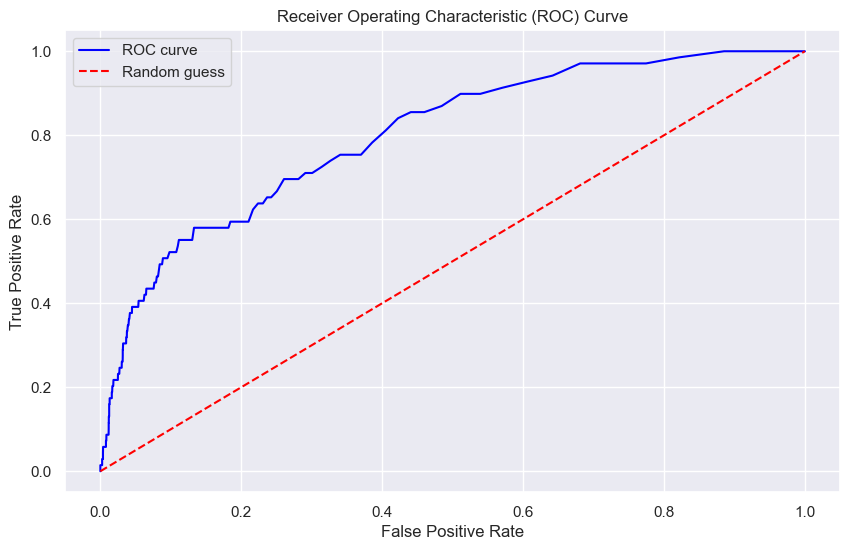

In [163]:
# plot area under roc curve with fpr and tpr for 2003
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assume 'finfraud_copy' is your DataFrame
X1 = finfraud_copy.drop(['misstate', 'p_aaer', 'gvkey'], axis=1)
y1 = finfraud_copy['misstate']

# Normalize the values in X1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)

# Adding the normalized features back into the DataFrame for easy indexing
X1_normalized_df = pd.DataFrame(X1_normalized, columns=X1.columns)

# Training data is fyear = 1991-2001, testing data is fyear 2003
X_train = X1_normalized_df[X1['fyear'] <= 2001]
X_test = X1_normalized_df[X1['fyear'] == 2003]

y_train = y1[X1['fyear'] <= 2001]
y_test = y1[X1['fyear'] == 2003]

# Calculate the class weight ratio
class_weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# Create a Random Forest model
model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: class_weight_ratio}, n_estimators=3000)

# Fit the model
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()







In [164]:
#export previous plot
plt.savefig('/Users/ryanhuang/Developer/GraLNA/New/ROC_curve.png')

<Figure size 640x480 with 0 Axes>

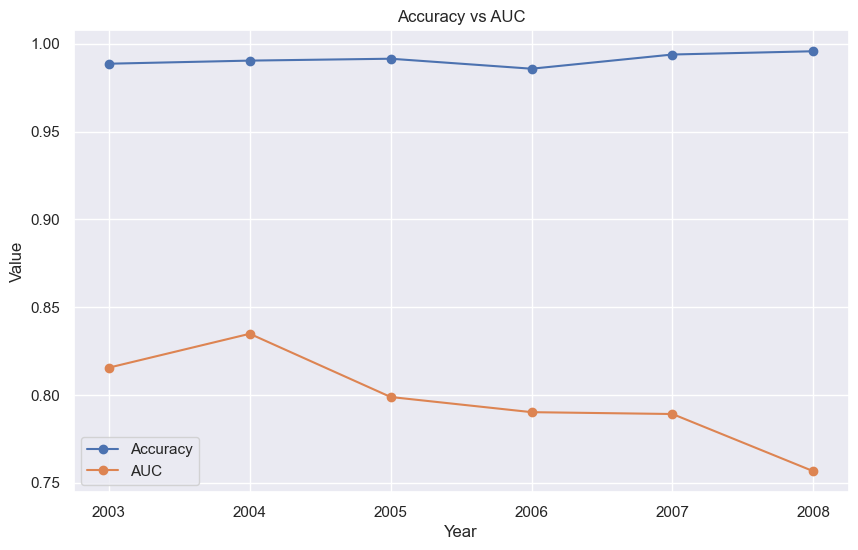

In [196]:
# plot random forest results accuracy vs auc

#load random forest results
results14 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RF/RandomForest_results28.csv')

#convert year to int
results14['year'] = results14['year'].astype(int)

# plot accuracy vs auc line graph
plt.figure(figsize=(10, 6))
plt.plot(results14['accuracy'], label='Accuracy', marker='o')
plt.plot(results14['auc'], label='AUC', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Accuracy vs AUC')
plt.xticks(range(len(results14['accuracy'])), results14['year'])
plt.legend()
plt.show()

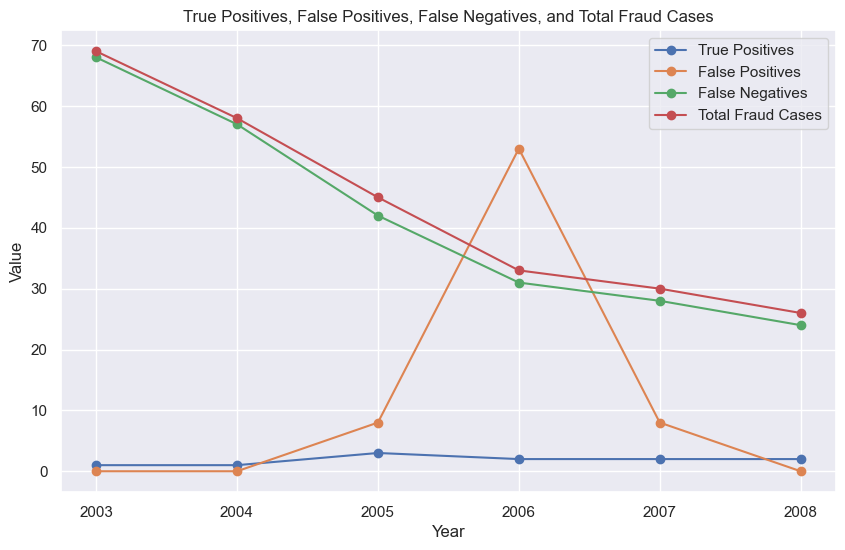

In [195]:
# plot random forest results tp, fp, fn, total fraud cases

# load random forest results
results15 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RF/RandomForest_results28.csv')

# convert year to int
results15['year'] = results15['year'].astype(int)

# plot true positives, false positives, false negatives, and total fraud cases
plt.figure(figsize=(10, 6))
plt.plot(results15['true_positives'], label='True Positives', marker='o')
plt.plot(results15['false_positives'], label='False Positives', marker='o')
plt.plot(results15['false_negatives'], label='False Negatives', marker='o')
plt.plot(results15['true_positives'] + results15['false_negatives'], label='Total Fraud Cases', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('True Positives, False Positives, False Negatives, and Total Fraud Cases')
plt.xticks(range(len(results15['true_positives'])), results15['year'])
plt.legend()
plt.show()

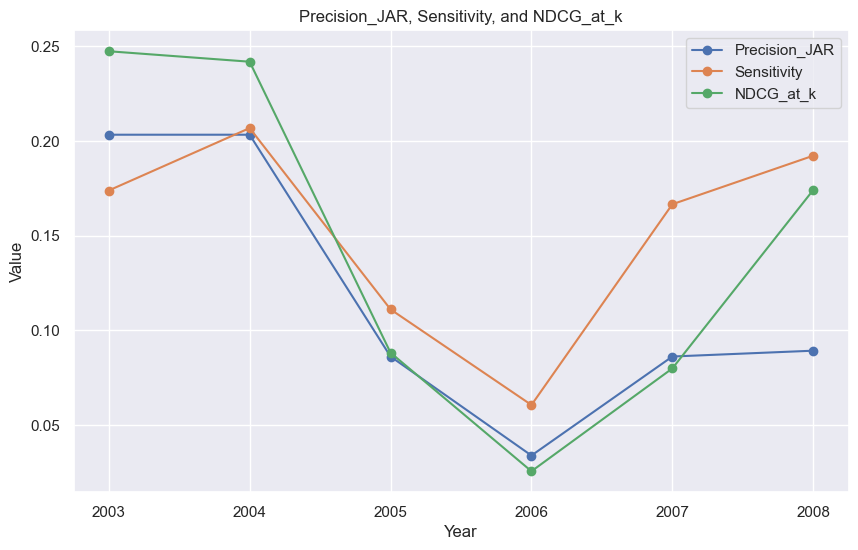

In [194]:
# plot random forest results precision_JAR vs sensitivity vs NDCG_at_k

# load random forest results
results16 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RF/RandomForest_results28.csv')

# convert year to int
results16['year'] = results16['year'].astype(int)

# plot precision_JAR, sensitivity, and NDCG_at_k
plt.figure(figsize=(10, 6))
plt.plot(results16['precision_JAR'], label='Precision_JAR', marker='o')
plt.plot(results16['sensitivity'], label='Sensitivity', marker='o')
plt.plot(results16['NDCG_at_k'], label='NDCG_at_k', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Precision_JAR, Sensitivity, and NDCG_at_k')
plt.xticks(range(len(results16['precision_JAR'])), results16['year'])
plt.legend()
plt.show()

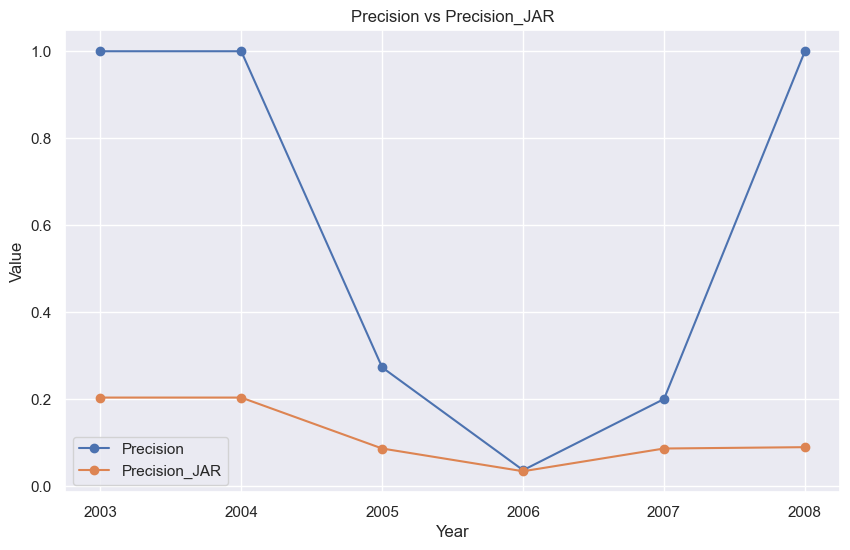

In [197]:
# plot random forest results precision vs precision_JAR

# load random forest results
results16 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RF/RandomForest_results28.csv')

# convert year to int
results16['year'] = results16['year'].astype(int)

# plot precision vs precision_JAR
plt.figure(figsize=(10, 6))
plt.plot(results16['precision'], label='Precision', marker='o')
plt.plot(results16['precision_JAR'], label='Precision_JAR', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Precision vs Precision_JAR')
plt.xticks(range(len(results16['precision'])), results16['year'])
plt.legend()

plt.show()

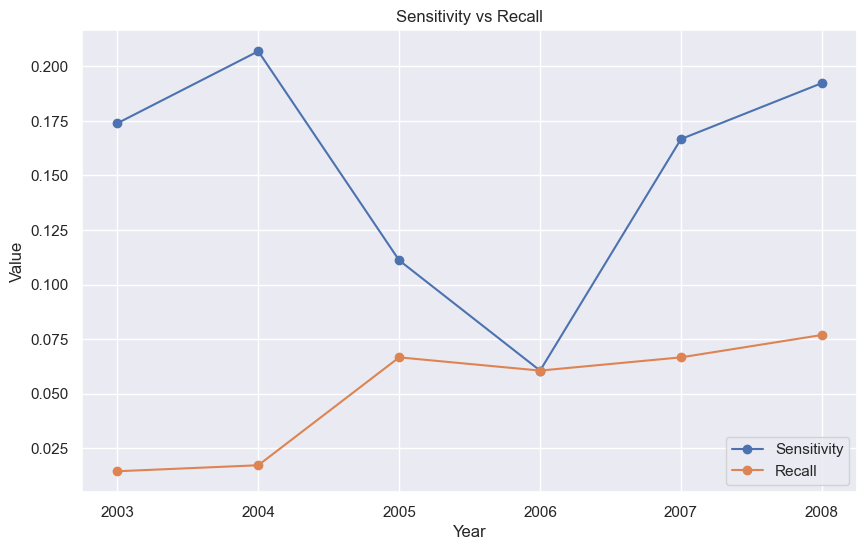

In [198]:
# plot random forest results sensitivity vs recall

# load random forest results
results16 = pd.read_csv('/Users/ryanhuang/Developer/GraLNA/New/RF/RandomForest_results28.csv')

# convert year to int
results16['year'] = results16['year'].astype(int)

# plot sensitivity vs recall
plt.figure(figsize=(10, 6))
plt.plot(results16['sensitivity'], label='Sensitivity', marker='o')
plt.plot(results16['recall'], label='Recall', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sensitivity vs Recall')
plt.xticks(range(len(results16['sensitivity'])), results16['year'])
plt.legend()
plt.show()